In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN","NAME","SPECIAL_CONSIDERATIONS"],inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df.APPLICATION_TYPE.value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

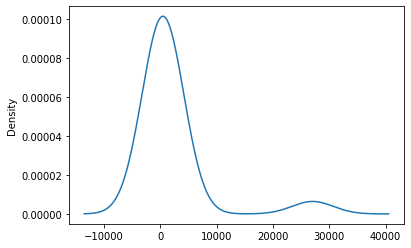

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type[application_type < 200].index)


# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification = application_df.CLASSIFICATION.value_counts()
classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C6100        1
C2600        1
C4500        1
C5200        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification[classification < 2000].index)


# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [12]:
# Look at INCOME_AMT value counts for binning
income_amt = application_df.INCOME_AMT.value_counts()
income_amt

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [13]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 80
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               4000      
_________________________________________________________________
dense_4 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 81        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"



In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
  896/25724 [>.............................] - ETA: 31s - loss: 0.6312 - accuracy: 0.6596 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1600/25724 [>.............................] - ETA: 18s - loss: 0.6141 - accuracy: 0.6850
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2912/25724 [==>...........................] - ETA: 11s - loss: 0.5947 - accuracy: 0.7078
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4064/25724 [===>..........................] - ETA: 8s - loss: 0.5968 - accuracy: 0.7045
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4864/25724 [====>.........................] - ETA: 7s - loss: 0.5901 - accuracy: 0.7109
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5888/25724 [=====>........................] - ETA: 6s - loss: 0.5865 - accuracy: 0.7120
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6944/25724 [=======>......................] - ETA: 5s - loss: 0.5838 - accuracy: 0.7

 4800/25724 [====>.........................] - ETA: 2s - loss: 0.5632 - accuracy: 0.7260
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5600/25724 [=====>........................] - ETA: 2s - loss: 0.5602 - accuracy: 0.7286
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6496/25724 [======>.......................] - ETA: 2s - loss: 0.5622 - accuracy: 0.7263
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7808/25724 [========>.....................] - ETA: 2s - loss: 0.5612 - accuracy: 0.7262
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8832/25724 [=========>....................] - ETA: 2s - loss: 0.5625 - accuracy: 0.7252
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9792/25724 [==========>...................] - ETA: 2s - loss: 0.5603 - accuracy: 0.7265
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10944/25724 [===========>..................] - ETA: 2s - loss: 0.5614 - accuracy: 0.7254
Epoch 00003: saving model to checkp

 9664/25724 [==========>...................] - ETA: 2s - loss: 0.5552 - accuracy: 0.7333
Epoch 00005: saving model to checkpoints/weights.05.hdf5
10272/25724 [==========>...................] - ETA: 2s - loss: 0.5552 - accuracy: 0.7330
Epoch 00005: saving model to checkpoints/weights.05.hdf5
11712/25724 [============>.................] - ETA: 2s - loss: 0.5560 - accuracy: 0.7328
Epoch 00005: saving model to checkpoints/weights.05.hdf5
12736/25724 [=============>................] - ETA: 2s - loss: 0.5567 - accuracy: 0.7310
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13632/25724 [==============>...............] - ETA: 2s - loss: 0.5552 - accuracy: 0.7317
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14752/25724 [================>.............] - ETA: 1s - loss: 0.5534 - accuracy: 0.7339
Epoch 00005: saving model to checkpoints/weights.05.hdf5
15520/25724 [=================>............] - ETA: 1s - loss: 0.5544 - accuracy: 0.7331
Epoch 00005: saving model to checkp

14272/25724 [===============>..............] - ETA: 1s - loss: 0.5510 - accuracy: 0.7347
Epoch 00007: saving model to checkpoints/weights.07.hdf5
15456/25724 [=================>............] - ETA: 1s - loss: 0.5499 - accuracy: 0.7354
Epoch 00007: saving model to checkpoints/weights.07.hdf5
16608/25724 [==================>...........] - ETA: 1s - loss: 0.5502 - accuracy: 0.7340
Epoch 00007: saving model to checkpoints/weights.07.hdf5
17376/25724 [===================>..........] - ETA: 1s - loss: 0.5490 - accuracy: 0.7343
Epoch 00007: saving model to checkpoints/weights.07.hdf5
18592/25724 [====================>.........] - ETA: 1s - loss: 0.5482 - accuracy: 0.7349
Epoch 00007: saving model to checkpoints/weights.07.hdf5
19680/25724 [=====================>........] - ETA: 0s - loss: 0.5500 - accuracy: 0.7337
Epoch 00007: saving model to checkpoints/weights.07.hdf5
20384/25724 [======================>.......] - ETA: 0s - loss: 0.5498 - accuracy: 0.7345
Epoch 00007: saving model to checkp

19296/25724 [=====================>........] - ETA: 1s - loss: 0.5503 - accuracy: 0.7343
Epoch 00009: saving model to checkpoints/weights.09.hdf5
20320/25724 [======================>.......] - ETA: 1s - loss: 0.5489 - accuracy: 0.7354
Epoch 00009: saving model to checkpoints/weights.09.hdf5
21056/25724 [=======================>......] - ETA: 0s - loss: 0.5492 - accuracy: 0.7352
Epoch 00009: saving model to checkpoints/weights.09.hdf5
22336/25724 [=========================>....] - ETA: 0s - loss: 0.5491 - accuracy: 0.7352
Epoch 00009: saving model to checkpoints/weights.09.hdf5
23488/25724 [==========================>...] - ETA: 0s - loss: 0.5499 - accuracy: 0.7344
Epoch 00009: saving model to checkpoints/weights.09.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.5495 - accuracy: 0.7346
Epoch 00009: saving model to checkpoints/weights.09.hdf5
25344/25724 [============================>.] - ETA: 0s - loss: 0.5495 - accuracy: 0.7347
Epoch 00009: saving model to checkp

23904/25724 [==========================>...] - ETA: 0s - loss: 0.5504 - accuracy: 0.7331
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 0.5499 - accuracy: 0.7332
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25724/25724 [==============================] - 4s 147us/sample - loss: 0.5496 - accuracy: 0.7337
Epoch 12/100
  448/25724 [..............................] - ETA: 3s - loss: 0.5232 - accuracy: 0.7656
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1216/25724 [>.............................] - ETA: 3s - loss: 0.5340 - accuracy: 0.7451
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2560/25724 [=>............................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7441
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3296/25724 [==>...........................] - ETA: 2s - loss: 0.5314 - accuracy: 0.7470
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 4544/25724 [=

 2176/25724 [=>............................] - ETA: 3s - loss: 0.5388 - accuracy: 0.7436
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3136/25724 [==>...........................] - ETA: 3s - loss: 0.5419 - accuracy: 0.7411
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4416/25724 [====>.........................] - ETA: 3s - loss: 0.5461 - accuracy: 0.7371
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5344/25724 [=====>........................] - ETA: 3s - loss: 0.5478 - accuracy: 0.7360
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 6336/25724 [======>.......................] - ETA: 3s - loss: 0.5485 - accuracy: 0.7342
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7328/25724 [=======>......................] - ETA: 2s - loss: 0.5508 - accuracy: 0.7316
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 8320/25724 [========>.....................] - ETA: 2s - loss: 0.5506 - accuracy: 0.7325
Epoch 00014: saving model to checkp

 6208/25724 [======>.......................] - ETA: 3s - loss: 0.5374 - accuracy: 0.7457
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7072/25724 [=======>......................] - ETA: 3s - loss: 0.5401 - accuracy: 0.7431
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8192/25724 [========>.....................] - ETA: 3s - loss: 0.5430 - accuracy: 0.7402
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9312/25724 [=========>....................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7396
Epoch 00016: saving model to checkpoints/weights.16.hdf5
10176/25724 [==========>...................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7398
Epoch 00016: saving model to checkpoints/weights.16.hdf5
11168/25724 [============>.................] - ETA: 2s - loss: 0.5438 - accuracy: 0.7389
Epoch 00016: saving model to checkpoints/weights.16.hdf5
12256/25724 [=============>................] - ETA: 2s - loss: 0.5460 - accuracy: 0.7372
Epoch 00016: saving model to checkp

10912/25724 [===========>..................] - ETA: 2s - loss: 0.5477 - accuracy: 0.7364
Epoch 00018: saving model to checkpoints/weights.18.hdf5
11936/25724 [============>.................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7376
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12864/25724 [==============>...............] - ETA: 1s - loss: 0.5453 - accuracy: 0.7369
Epoch 00018: saving model to checkpoints/weights.18.hdf5
13984/25724 [===============>..............] - ETA: 1s - loss: 0.5457 - accuracy: 0.7366
Epoch 00018: saving model to checkpoints/weights.18.hdf5
15072/25724 [================>.............] - ETA: 1s - loss: 0.5455 - accuracy: 0.7365
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16032/25724 [=================>............] - ETA: 1s - loss: 0.5471 - accuracy: 0.7355
Epoch 00018: saving model to checkpoints/weights.18.hdf5
17056/25724 [==================>...........] - ETA: 1s - loss: 0.5457 - accuracy: 0.7365
Epoch 00018: saving model to checkp

15936/25724 [=================>............] - ETA: 1s - loss: 0.5428 - accuracy: 0.7371
Epoch 00020: saving model to checkpoints/weights.20.hdf5
16640/25724 [==================>...........] - ETA: 1s - loss: 0.5433 - accuracy: 0.7365
Epoch 00020: saving model to checkpoints/weights.20.hdf5
17856/25724 [===================>..........] - ETA: 1s - loss: 0.5441 - accuracy: 0.7364
Epoch 00020: saving model to checkpoints/weights.20.hdf5
18976/25724 [=====================>........] - ETA: 1s - loss: 0.5449 - accuracy: 0.7360
Epoch 00020: saving model to checkpoints/weights.20.hdf5
19680/25724 [=====================>........] - ETA: 0s - loss: 0.5444 - accuracy: 0.7368
Epoch 00020: saving model to checkpoints/weights.20.hdf5
20928/25724 [=======================>......] - ETA: 0s - loss: 0.5452 - accuracy: 0.7362
Epoch 00020: saving model to checkpoints/weights.20.hdf5
22048/25724 [========================>.....] - ETA: 0s - loss: 0.5462 - accuracy: 0.7352
Epoch 00020: saving model to checkp

20640/25724 [=======================>......] - ETA: 0s - loss: 0.5448 - accuracy: 0.7375
Epoch 00022: saving model to checkpoints/weights.22.hdf5
21728/25724 [========================>.....] - ETA: 0s - loss: 0.5449 - accuracy: 0.7371
Epoch 00022: saving model to checkpoints/weights.22.hdf5
22816/25724 [=========================>....] - ETA: 0s - loss: 0.5451 - accuracy: 0.7369
Epoch 00022: saving model to checkpoints/weights.22.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.5448 - accuracy: 0.7370
Epoch 00022: saving model to checkpoints/weights.22.hdf5
24544/25724 [===========================>..] - ETA: 0s - loss: 0.5456 - accuracy: 0.7364
Epoch 00022: saving model to checkpoints/weights.22.hdf5
25724/25724 [==============================] - 4s 163us/sample - loss: 0.5459 - accuracy: 0.7364
Epoch 23/100
   32/25724 [..............................] - ETA: 5s - loss: 0.5133 - accuracy: 0.7500
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 1120/25724 [>

25344/25724 [============================>.] - ETA: 0s - loss: 0.5451 - accuracy: 0.7362
Epoch 00024: saving model to checkpoints/weights.24.hdf5
25724/25724 [==============================] - 4s 163us/sample - loss: 0.5452 - accuracy: 0.7363
Epoch 25/100
  800/25724 [..............................] - ETA: 3s - loss: 0.5475 - accuracy: 0.7450
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 1856/25724 [=>............................] - ETA: 3s - loss: 0.5447 - accuracy: 0.7468
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 2944/25724 [==>...........................] - ETA: 3s - loss: 0.5392 - accuracy: 0.7537
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 4064/25724 [===>..........................] - ETA: 3s - loss: 0.5415 - accuracy: 0.7488
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 4736/25724 [====>.........................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7492
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 5920/25724 [=

 3744/25724 [===>..........................] - ETA: 3s - loss: 0.5517 - accuracy: 0.7358
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 4800/25724 [====>.........................] - ETA: 3s - loss: 0.5477 - accuracy: 0.7387
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5472/25724 [=====>........................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7412
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 6720/25724 [======>.......................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7391
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 7840/25724 [========>.....................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7397
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 8832/25724 [=========>....................] - ETA: 2s - loss: 0.5421 - accuracy: 0.7390
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 9920/25724 [==========>...................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7385
Epoch 00027: saving model to checkp

 8608/25724 [=========>....................] - ETA: 2s - loss: 0.5478 - accuracy: 0.7318
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 9600/25724 [==========>...................] - ETA: 2s - loss: 0.5478 - accuracy: 0.7331
Epoch 00029: saving model to checkpoints/weights.29.hdf5
10624/25724 [===========>..................] - ETA: 2s - loss: 0.5471 - accuracy: 0.7344
Epoch 00029: saving model to checkpoints/weights.29.hdf5
11616/25724 [============>.................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7361
Epoch 00029: saving model to checkpoints/weights.29.hdf5
12416/25724 [=============>................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7362
Epoch 00029: saving model to checkpoints/weights.29.hdf5
13568/25724 [==============>...............] - ETA: 2s - loss: 0.5456 - accuracy: 0.7375
Epoch 00029: saving model to checkpoints/weights.29.hdf5
14688/25724 [================>.............] - ETA: 1s - loss: 0.5448 - accuracy: 0.7381
Epoch 00029: saving model to checkp

13472/25724 [==============>...............] - ETA: 1s - loss: 0.5440 - accuracy: 0.7345
Epoch 00031: saving model to checkpoints/weights.31.hdf5
14400/25724 [===============>..............] - ETA: 1s - loss: 0.5447 - accuracy: 0.7345
Epoch 00031: saving model to checkpoints/weights.31.hdf5
15424/25724 [================>.............] - ETA: 1s - loss: 0.5461 - accuracy: 0.7340
Epoch 00031: saving model to checkpoints/weights.31.hdf5
16480/25724 [==================>...........] - ETA: 1s - loss: 0.5458 - accuracy: 0.7348
Epoch 00031: saving model to checkpoints/weights.31.hdf5
17504/25724 [===================>..........] - ETA: 1s - loss: 0.5454 - accuracy: 0.7350
Epoch 00031: saving model to checkpoints/weights.31.hdf5
18592/25724 [====================>.........] - ETA: 1s - loss: 0.5446 - accuracy: 0.7357
Epoch 00031: saving model to checkpoints/weights.31.hdf5
19648/25724 [=====================>........] - ETA: 0s - loss: 0.5458 - accuracy: 0.7347
Epoch 00031: saving model to checkp

18112/25724 [====================>.........] - ETA: 1s - loss: 0.5430 - accuracy: 0.7362
Epoch 00033: saving model to checkpoints/weights.33.hdf5
19424/25724 [=====================>........] - ETA: 1s - loss: 0.5429 - accuracy: 0.7356
Epoch 00033: saving model to checkpoints/weights.33.hdf5
20224/25724 [======================>.......] - ETA: 0s - loss: 0.5430 - accuracy: 0.7360
Epoch 00033: saving model to checkpoints/weights.33.hdf5
21184/25724 [=======================>......] - ETA: 0s - loss: 0.5439 - accuracy: 0.7356
Epoch 00033: saving model to checkpoints/weights.33.hdf5
22272/25724 [========================>.....] - ETA: 0s - loss: 0.5432 - accuracy: 0.7356
Epoch 00033: saving model to checkpoints/weights.33.hdf5
23328/25724 [==========================>...] - ETA: 0s - loss: 0.5424 - accuracy: 0.7365
Epoch 00033: saving model to checkpoints/weights.33.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.5425 - accuracy: 0.7369
Epoch 00033: saving model to checkp

22976/25724 [=========================>....] - ETA: 0s - loss: 0.5437 - accuracy: 0.7380
Epoch 00035: saving model to checkpoints/weights.35.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5430 - accuracy: 0.7387
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.5426 - accuracy: 0.7391
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25724/25724 [==============================] - 5s 208us/sample - loss: 0.5430 - accuracy: 0.7386
Epoch 36/100
  320/25724 [..............................] - ETA: 4s - loss: 0.5731 - accuracy: 0.7031
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1568/25724 [>.............................] - ETA: 4s - loss: 0.5407 - accuracy: 0.7392
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 2496/25724 [=>............................] - ETA: 4s - loss: 0.5355 - accuracy: 0.7428
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 3616/25724 [=

 1312/25724 [>.............................] - ETA: 5s - loss: 0.5423 - accuracy: 0.7378
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 2144/25724 [=>............................] - ETA: 5s - loss: 0.5363 - accuracy: 0.7341
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3296/25724 [==>...........................] - ETA: 4s - loss: 0.5301 - accuracy: 0.7370
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 4256/25724 [===>..........................] - ETA: 4s - loss: 0.5347 - accuracy: 0.7345
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 5472/25724 [=====>........................] - ETA: 4s - loss: 0.5364 - accuracy: 0.7359
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 6464/25724 [======>.......................] - ETA: 4s - loss: 0.5392 - accuracy: 0.7345
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 7328/25724 [=======>......................] - ETA: 4s - loss: 0.5399 - accuracy: 0.7347
Epoch 00038: saving model to checkp

 5952/25724 [=====>........................] - ETA: 4s - loss: 0.5329 - accuracy: 0.7445
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 6976/25724 [=======>......................] - ETA: 3s - loss: 0.5322 - accuracy: 0.7457
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 8000/25724 [========>.....................] - ETA: 3s - loss: 0.5345 - accuracy: 0.7424
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 9312/25724 [=========>....................] - ETA: 3s - loss: 0.5396 - accuracy: 0.7400
Epoch 00040: saving model to checkpoints/weights.40.hdf5
10208/25724 [==========>...................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7401
Epoch 00040: saving model to checkpoints/weights.40.hdf5
11136/25724 [===========>..................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7386
Epoch 00040: saving model to checkpoints/weights.40.hdf5
12384/25724 [=============>................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7384
Epoch 00040: saving model to checkp

10848/25724 [===========>..................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7417
Epoch 00042: saving model to checkpoints/weights.42.hdf5
11872/25724 [============>.................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7411
Epoch 00042: saving model to checkpoints/weights.42.hdf5
12896/25724 [==============>...............] - ETA: 2s - loss: 0.5381 - accuracy: 0.7409
Epoch 00042: saving model to checkpoints/weights.42.hdf5
13824/25724 [===============>..............] - ETA: 1s - loss: 0.5371 - accuracy: 0.7424
Epoch 00042: saving model to checkpoints/weights.42.hdf5
14944/25724 [================>.............] - ETA: 1s - loss: 0.5392 - accuracy: 0.7401
Epoch 00042: saving model to checkpoints/weights.42.hdf5
15936/25724 [=================>............] - ETA: 1s - loss: 0.5399 - accuracy: 0.7387
Epoch 00042: saving model to checkpoints/weights.42.hdf5
16960/25724 [==================>...........] - ETA: 1s - loss: 0.5415 - accuracy: 0.7379
Epoch 00042: saving model to checkp

15680/25724 [=================>............] - ETA: 1s - loss: 0.5440 - accuracy: 0.7365
Epoch 00044: saving model to checkpoints/weights.44.hdf5
16736/25724 [==================>...........] - ETA: 1s - loss: 0.5438 - accuracy: 0.7366
Epoch 00044: saving model to checkpoints/weights.44.hdf5
17728/25724 [===================>..........] - ETA: 1s - loss: 0.5450 - accuracy: 0.7353
Epoch 00044: saving model to checkpoints/weights.44.hdf5
18784/25724 [====================>.........] - ETA: 1s - loss: 0.5446 - accuracy: 0.7358
Epoch 00044: saving model to checkpoints/weights.44.hdf5
19808/25724 [======================>.......] - ETA: 0s - loss: 0.5438 - accuracy: 0.7368
Epoch 00044: saving model to checkpoints/weights.44.hdf5
20800/25724 [=======================>......] - ETA: 0s - loss: 0.5426 - accuracy: 0.7376
Epoch 00044: saving model to checkpoints/weights.44.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5425 - accuracy: 0.7377
Epoch 00044: saving model to checkp

20544/25724 [======================>.......] - ETA: 0s - loss: 0.5390 - accuracy: 0.7408
Epoch 00046: saving model to checkpoints/weights.46.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.5397 - accuracy: 0.7401
Epoch 00046: saving model to checkpoints/weights.46.hdf5
22592/25724 [=========================>....] - ETA: 0s - loss: 0.5403 - accuracy: 0.7393
Epoch 00046: saving model to checkpoints/weights.46.hdf5
23616/25724 [==========================>...] - ETA: 0s - loss: 0.5408 - accuracy: 0.7389
Epoch 00046: saving model to checkpoints/weights.46.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.5417 - accuracy: 0.7384
Epoch 00046: saving model to checkpoints/weights.46.hdf5
25724/25724 [==============================] - 4s 158us/sample - loss: 0.5417 - accuracy: 0.7383
Epoch 47/100
   32/25724 [..............................] - ETA: 6s - loss: 0.4692 - accuracy: 0.7812
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 1024/25724 [>

25376/25724 [============================>.] - ETA: 0s - loss: 0.5414 - accuracy: 0.7391
Epoch 00048: saving model to checkpoints/weights.48.hdf5
25724/25724 [==============================] - 4s 158us/sample - loss: 0.5415 - accuracy: 0.7388
Epoch 49/100
  800/25724 [..............................] - ETA: 3s - loss: 0.5301 - accuracy: 0.7437
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 1824/25724 [=>............................] - ETA: 3s - loss: 0.5337 - accuracy: 0.7462
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 2720/25724 [==>...........................] - ETA: 3s - loss: 0.5379 - accuracy: 0.7404
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 3840/25724 [===>..........................] - ETA: 3s - loss: 0.5455 - accuracy: 0.7331
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 4768/25724 [====>.........................] - ETA: 3s - loss: 0.5444 - accuracy: 0.7376
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 5824/25724 [=

 3552/25724 [===>..........................] - ETA: 3s - loss: 0.5276 - accuracy: 0.7534
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 4608/25724 [====>.........................] - ETA: 3s - loss: 0.5262 - accuracy: 0.7543
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 5632/25724 [=====>........................] - ETA: 3s - loss: 0.5340 - accuracy: 0.7472
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 6592/25724 [======>.......................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7476
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 7680/25724 [=======>......................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7458
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 8608/25724 [=========>....................] - ETA: 2s - loss: 0.5339 - accuracy: 0.7451
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 9728/25724 [==========>...................] - ETA: 2s - loss: 0.5317 - accuracy: 0.7455
Epoch 00051: saving model to checkp

 8320/25724 [========>.....................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7436
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 9440/25724 [==========>...................] - ETA: 2s - loss: 0.5356 - accuracy: 0.7459
Epoch 00053: saving model to checkpoints/weights.53.hdf5
10464/25724 [===========>..................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7438
Epoch 00053: saving model to checkpoints/weights.53.hdf5
11424/25724 [============>.................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7445
Epoch 00053: saving model to checkpoints/weights.53.hdf5
12544/25724 [=============>................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7418
Epoch 00053: saving model to checkpoints/weights.53.hdf5
13600/25724 [==============>...............] - ETA: 1s - loss: 0.5394 - accuracy: 0.7410
Epoch 00053: saving model to checkpoints/weights.53.hdf5
14624/25724 [================>.............] - ETA: 1s - loss: 0.5395 - accuracy: 0.7399
Epoch 00053: saving model to checkp

12224/25724 [=============>................] - ETA: 4s - loss: 0.5401 - accuracy: 0.7383
Epoch 00055: saving model to checkpoints/weights.55.hdf5
13408/25724 [==============>...............] - ETA: 4s - loss: 0.5389 - accuracy: 0.7396
Epoch 00055: saving model to checkpoints/weights.55.hdf5
14464/25724 [===============>..............] - ETA: 3s - loss: 0.5383 - accuracy: 0.7403
Epoch 00055: saving model to checkpoints/weights.55.hdf5
15328/25724 [================>.............] - ETA: 3s - loss: 0.5358 - accuracy: 0.7425
Epoch 00055: saving model to checkpoints/weights.55.hdf5
16256/25724 [=================>............] - ETA: 2s - loss: 0.5365 - accuracy: 0.7421
Epoch 00055: saving model to checkpoints/weights.55.hdf5
17376/25724 [===================>..........] - ETA: 2s - loss: 0.5380 - accuracy: 0.7408
Epoch 00055: saving model to checkpoints/weights.55.hdf5
18336/25724 [====================>.........] - ETA: 2s - loss: 0.5390 - accuracy: 0.7403
Epoch 00055: saving model to checkp

17120/25724 [==================>...........] - ETA: 1s - loss: 0.5389 - accuracy: 0.7387
Epoch 00057: saving model to checkpoints/weights.57.hdf5
18080/25724 [====================>.........] - ETA: 1s - loss: 0.5376 - accuracy: 0.7397
Epoch 00057: saving model to checkpoints/weights.57.hdf5
19168/25724 [=====================>........] - ETA: 1s - loss: 0.5382 - accuracy: 0.7396
Epoch 00057: saving model to checkpoints/weights.57.hdf5
20192/25724 [======================>.......] - ETA: 0s - loss: 0.5392 - accuracy: 0.7394
Epoch 00057: saving model to checkpoints/weights.57.hdf5
21184/25724 [=======================>......] - ETA: 0s - loss: 0.5390 - accuracy: 0.7398
Epoch 00057: saving model to checkpoints/weights.57.hdf5
22272/25724 [========================>.....] - ETA: 0s - loss: 0.5395 - accuracy: 0.7398
Epoch 00057: saving model to checkpoints/weights.57.hdf5
23232/25724 [==========================>...] - ETA: 0s - loss: 0.5398 - accuracy: 0.7395
Epoch 00057: saving model to checkp

21952/25724 [========================>.....] - ETA: 0s - loss: 0.5408 - accuracy: 0.7385
Epoch 00059: saving model to checkpoints/weights.59.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5408 - accuracy: 0.7381
Epoch 00059: saving model to checkpoints/weights.59.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.5409 - accuracy: 0.7385
Epoch 00059: saving model to checkpoints/weights.59.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.5397 - accuracy: 0.7393
Epoch 00059: saving model to checkpoints/weights.59.hdf5
25724/25724 [==============================] - 4s 157us/sample - loss: 0.5404 - accuracy: 0.7384
Epoch 60/100
  384/25724 [..............................] - ETA: 3s - loss: 0.5540 - accuracy: 0.7292
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 1408/25724 [>.............................] - ETA: 3s - loss: 0.5534 - accuracy: 0.7273
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2432/25724 [=

Epoch 62/100
   32/25724 [..............................] - ETA: 6s - loss: 0.3975 - accuracy: 0.8438
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 1152/25724 [>.............................] - ETA: 3s - loss: 0.5442 - accuracy: 0.7326
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 2176/25724 [=>............................] - ETA: 3s - loss: 0.5356 - accuracy: 0.7440
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 3168/25724 [==>...........................] - ETA: 3s - loss: 0.5327 - accuracy: 0.7468
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 4160/25724 [===>..........................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7392
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 5248/25724 [=====>........................] - ETA: 3s - loss: 0.5414 - accuracy: 0.7372
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 6208/25724 [======>.......................] - ETA: 3s - loss: 0.5385 - accuracy: 0.7400
Epoch 00062: saving mo

 3936/25724 [===>..........................] - ETA: 3s - loss: 0.5314 - accuracy: 0.7503
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 4992/25724 [====>.........................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7476
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 5952/25724 [=====>........................] - ETA: 3s - loss: 0.5329 - accuracy: 0.7478
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 6976/25724 [=======>......................] - ETA: 3s - loss: 0.5347 - accuracy: 0.7457
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 8032/25724 [========>.....................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7433
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 8960/25724 [=========>....................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7425
Epoch 00064: saving model to checkpoints/weights.64.hdf5
10080/25724 [==========>...................] - ETA: 2s - loss: 0.5403 - accuracy: 0.7419
Epoch 00064: saving model to checkp

 8768/25724 [=========>....................] - ETA: 2s - loss: 0.5310 - accuracy: 0.7417
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 9856/25724 [==========>...................] - ETA: 2s - loss: 0.5334 - accuracy: 0.7410
Epoch 00066: saving model to checkpoints/weights.66.hdf5
10848/25724 [===========>..................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7436
Epoch 00066: saving model to checkpoints/weights.66.hdf5
11872/25724 [============>.................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7437
Epoch 00066: saving model to checkpoints/weights.66.hdf5
12896/25724 [==============>...............] - ETA: 2s - loss: 0.5311 - accuracy: 0.7448
Epoch 00066: saving model to checkpoints/weights.66.hdf5
13952/25724 [===============>..............] - ETA: 1s - loss: 0.5319 - accuracy: 0.7443
Epoch 00066: saving model to checkpoints/weights.66.hdf5
15008/25724 [================>.............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7426
Epoch 00066: saving model to checkp

13664/25724 [==============>...............] - ETA: 1s - loss: 0.5393 - accuracy: 0.7376
Epoch 00068: saving model to checkpoints/weights.68.hdf5
14656/25724 [================>.............] - ETA: 1s - loss: 0.5401 - accuracy: 0.7370
Epoch 00068: saving model to checkpoints/weights.68.hdf5
15744/25724 [=================>............] - ETA: 1s - loss: 0.5396 - accuracy: 0.7386
Epoch 00068: saving model to checkpoints/weights.68.hdf5
16768/25724 [==================>...........] - ETA: 1s - loss: 0.5391 - accuracy: 0.7386
Epoch 00068: saving model to checkpoints/weights.68.hdf5
17856/25724 [===================>..........] - ETA: 1s - loss: 0.5384 - accuracy: 0.7398
Epoch 00068: saving model to checkpoints/weights.68.hdf5
18816/25724 [====================>.........] - ETA: 1s - loss: 0.5383 - accuracy: 0.7391
Epoch 00068: saving model to checkpoints/weights.68.hdf5
19872/25724 [======================>.......] - ETA: 0s - loss: 0.5385 - accuracy: 0.7389
Epoch 00068: saving model to checkp

18528/25724 [====================>.........] - ETA: 1s - loss: 0.5436 - accuracy: 0.7375
Epoch 00070: saving model to checkpoints/weights.70.hdf5
19584/25724 [=====================>........] - ETA: 0s - loss: 0.5429 - accuracy: 0.7381
Epoch 00070: saving model to checkpoints/weights.70.hdf5
20576/25724 [======================>.......] - ETA: 0s - loss: 0.5426 - accuracy: 0.7385
Epoch 00070: saving model to checkpoints/weights.70.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.5418 - accuracy: 0.7390
Epoch 00070: saving model to checkpoints/weights.70.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5419 - accuracy: 0.7391
Epoch 00070: saving model to checkpoints/weights.70.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5410 - accuracy: 0.7394
Epoch 00070: saving model to checkpoints/weights.70.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5405 - accuracy: 0.7394
Epoch 00070: saving model to checkp

23328/25724 [==========================>...] - ETA: 0s - loss: 0.5396 - accuracy: 0.7394
Epoch 00072: saving model to checkpoints/weights.72.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.5390 - accuracy: 0.7398
Epoch 00072: saving model to checkpoints/weights.72.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 0.5398 - accuracy: 0.7393
Epoch 00072: saving model to checkpoints/weights.72.hdf5
25724/25724 [==============================] - 4s 163us/sample - loss: 0.5402 - accuracy: 0.7390
Epoch 73/100
  736/25724 [..............................] - ETA: 3s - loss: 0.5291 - accuracy: 0.7514
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 1760/25724 [=>............................] - ETA: 3s - loss: 0.5472 - accuracy: 0.7392
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 2720/25724 [==>...........................] - ETA: 3s - loss: 0.5423 - accuracy: 0.7434
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 3808/25724 [=

 1696/25724 [>.............................] - ETA: 3s - loss: 0.5288 - accuracy: 0.7459
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 2656/25724 [==>...........................] - ETA: 3s - loss: 0.5250 - accuracy: 0.7481
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 3648/25724 [===>..........................] - ETA: 3s - loss: 0.5300 - accuracy: 0.7415
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 4672/25724 [====>.........................] - ETA: 3s - loss: 0.5355 - accuracy: 0.7389
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 5696/25724 [=====>........................] - ETA: 3s - loss: 0.5417 - accuracy: 0.7351
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 6688/25724 [======>.......................] - ETA: 3s - loss: 0.5460 - accuracy: 0.7331
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 7712/25724 [=======>......................] - ETA: 2s - loss: 0.5454 - accuracy: 0.7339
Epoch 00075: saving model to checkp

 6336/25724 [======>.......................] - ETA: 3s - loss: 0.5420 - accuracy: 0.7369
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 7424/25724 [=======>......................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7342
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 8352/25724 [========>.....................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7365
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 9440/25724 [==========>...................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7363
Epoch 00077: saving model to checkpoints/weights.77.hdf5
10464/25724 [===========>..................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7381
Epoch 00077: saving model to checkpoints/weights.77.hdf5
11456/25724 [============>.................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7377
Epoch 00077: saving model to checkpoints/weights.77.hdf5
12512/25724 [=============>................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7370
Epoch 00077: saving model to checkp

11200/25724 [============>.................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7419
Epoch 00079: saving model to checkpoints/weights.79.hdf5
12288/25724 [=============>................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7406
Epoch 00079: saving model to checkpoints/weights.79.hdf5
13248/25724 [==============>...............] - ETA: 1s - loss: 0.5380 - accuracy: 0.7385
Epoch 00079: saving model to checkpoints/weights.79.hdf5
14304/25724 [===============>..............] - ETA: 1s - loss: 0.5368 - accuracy: 0.7406
Epoch 00079: saving model to checkpoints/weights.79.hdf5
15296/25724 [================>.............] - ETA: 1s - loss: 0.5370 - accuracy: 0.7405
Epoch 00079: saving model to checkpoints/weights.79.hdf5
16320/25724 [==================>...........] - ETA: 1s - loss: 0.5386 - accuracy: 0.7393
Epoch 00079: saving model to checkpoints/weights.79.hdf5
17376/25724 [===================>..........] - ETA: 1s - loss: 0.5370 - accuracy: 0.7408
Epoch 00079: saving model to checkp

16096/25724 [=================>............] - ETA: 1s - loss: 0.5388 - accuracy: 0.7375
Epoch 00081: saving model to checkpoints/weights.81.hdf5
17120/25724 [==================>...........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7370
Epoch 00081: saving model to checkpoints/weights.81.hdf5
18144/25724 [====================>.........] - ETA: 1s - loss: 0.5392 - accuracy: 0.7376
Epoch 00081: saving model to checkpoints/weights.81.hdf5
19200/25724 [=====================>........] - ETA: 1s - loss: 0.5386 - accuracy: 0.7383
Epoch 00081: saving model to checkpoints/weights.81.hdf5
20448/25724 [======================>.......] - ETA: 0s - loss: 0.5392 - accuracy: 0.7375
Epoch 00081: saving model to checkpoints/weights.81.hdf5
21376/25724 [=======================>......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7375
Epoch 00081: saving model to checkpoints/weights.81.hdf5
22368/25724 [=========================>....] - ETA: 0s - loss: 0.5399 - accuracy: 0.7375
Epoch 00081: saving model to checkp

20992/25724 [=======================>......] - ETA: 0s - loss: 0.5370 - accuracy: 0.7395
Epoch 00083: saving model to checkpoints/weights.83.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.5376 - accuracy: 0.7394
Epoch 00083: saving model to checkpoints/weights.83.hdf5
23008/25724 [=========================>....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7387
Epoch 00083: saving model to checkpoints/weights.83.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.5391 - accuracy: 0.7383
Epoch 00083: saving model to checkpoints/weights.83.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5395 - accuracy: 0.7385
Epoch 00083: saving model to checkpoints/weights.83.hdf5
25724/25724 [==============================] - 4s 157us/sample - loss: 0.5395 - accuracy: 0.7386
Epoch 84/100
  384/25724 [..............................] - ETA: 4s - loss: 0.5252 - accuracy: 0.7682
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 1408/25724 [>

25724/25724 [==============================] - 4s 157us/sample - loss: 0.5392 - accuracy: 0.7395
Epoch 86/100
   32/25724 [..............................] - ETA: 5s - loss: 0.6139 - accuracy: 0.6875
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 1088/25724 [>.............................] - ETA: 3s - loss: 0.5204 - accuracy: 0.7564
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 2208/25724 [=>............................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7464
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 3200/25724 [==>...........................] - ETA: 3s - loss: 0.5351 - accuracy: 0.7419
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 4192/25724 [===>..........................] - ETA: 3s - loss: 0.5356 - accuracy: 0.7419
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 5184/25724 [=====>........................] - ETA: 3s - loss: 0.5349 - accuracy: 0.7415
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 6240/25724 [=

 4000/25724 [===>..........................] - ETA: 3s - loss: 0.5316 - accuracy: 0.7458
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 5024/25724 [====>.........................] - ETA: 3s - loss: 0.5347 - accuracy: 0.7430
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 6080/25724 [======>.......................] - ETA: 3s - loss: 0.5366 - accuracy: 0.7431
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 7040/25724 [=======>......................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7420
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 8064/25724 [========>.....................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7405
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 9056/25724 [=========>....................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7419
Epoch 00088: saving model to checkpoints/weights.88.hdf5
10048/25724 [==========>...................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7426
Epoch 00088: saving model to checkp

 8800/25724 [=========>....................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7364
Epoch 00090: saving model to checkpoints/weights.90.hdf5
 9792/25724 [==========>...................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7392
Epoch 00090: saving model to checkpoints/weights.90.hdf5
10848/25724 [===========>..................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7396
Epoch 00090: saving model to checkpoints/weights.90.hdf5
11936/25724 [============>.................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7384
Epoch 00090: saving model to checkpoints/weights.90.hdf5
12928/25724 [==============>...............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7396
Epoch 00090: saving model to checkpoints/weights.90.hdf5
13856/25724 [===============>..............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7398
Epoch 00090: saving model to checkpoints/weights.90.hdf5
14976/25724 [================>.............] - ETA: 1s - loss: 0.5363 - accuracy: 0.7421
Epoch 00090: saving model to checkp

13664/25724 [==============>...............] - ETA: 1s - loss: 0.5353 - accuracy: 0.7411
Epoch 00092: saving model to checkpoints/weights.92.hdf5
14720/25724 [================>.............] - ETA: 1s - loss: 0.5346 - accuracy: 0.7418
Epoch 00092: saving model to checkpoints/weights.92.hdf5
15744/25724 [=================>............] - ETA: 1s - loss: 0.5364 - accuracy: 0.7412
Epoch 00092: saving model to checkpoints/weights.92.hdf5
16800/25724 [==================>...........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7401
Epoch 00092: saving model to checkpoints/weights.92.hdf5
17824/25724 [===================>..........] - ETA: 1s - loss: 0.5378 - accuracy: 0.7398
Epoch 00092: saving model to checkpoints/weights.92.hdf5
18912/25724 [=====================>........] - ETA: 1s - loss: 0.5386 - accuracy: 0.7388
Epoch 00092: saving model to checkpoints/weights.92.hdf5
19904/25724 [======================>.......] - ETA: 0s - loss: 0.5387 - accuracy: 0.7387
Epoch 00092: saving model to checkp

18560/25724 [====================>.........] - ETA: 1s - loss: 0.5380 - accuracy: 0.7399
Epoch 00094: saving model to checkpoints/weights.94.hdf5
19584/25724 [=====================>........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7396
Epoch 00094: saving model to checkpoints/weights.94.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 0.5381 - accuracy: 0.7393
Epoch 00094: saving model to checkpoints/weights.94.hdf5
21696/25724 [========================>.....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7390
Epoch 00094: saving model to checkpoints/weights.94.hdf5
22592/25724 [=========================>....] - ETA: 0s - loss: 0.5391 - accuracy: 0.7391
Epoch 00094: saving model to checkpoints/weights.94.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5403 - accuracy: 0.7380
Epoch 00094: saving model to checkpoints/weights.94.hdf5
24672/25724 [===========================>..] - ETA: 0s - loss: 0.5401 - accuracy: 0.7385
Epoch 00094: saving model to checkp

23360/25724 [==========================>...] - ETA: 0s - loss: 0.5397 - accuracy: 0.7390
Epoch 00096: saving model to checkpoints/weights.96.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.5385 - accuracy: 0.7398
Epoch 00096: saving model to checkpoints/weights.96.hdf5
25344/25724 [============================>.] - ETA: 0s - loss: 0.5387 - accuracy: 0.7399
Epoch 00096: saving model to checkpoints/weights.96.hdf5
25724/25724 [==============================] - 4s 158us/sample - loss: 0.5387 - accuracy: 0.7399
Epoch 97/100
  768/25724 [..............................] - ETA: 3s - loss: 0.5583 - accuracy: 0.7201
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 1824/25724 [=>............................] - ETA: 3s - loss: 0.5333 - accuracy: 0.7292
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 2880/25724 [==>...........................] - ETA: 3s - loss: 0.5351 - accuracy: 0.7354
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 3840/25724 [=

 1536/25724 [>.............................] - ETA: 3s - loss: 0.5074 - accuracy: 0.7637
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 2592/25724 [==>...........................] - ETA: 3s - loss: 0.5176 - accuracy: 0.7531
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 3552/25724 [===>..........................] - ETA: 3s - loss: 0.5286 - accuracy: 0.7466
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 4576/25724 [====>.........................] - ETA: 3s - loss: 0.5349 - accuracy: 0.7434
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 5632/25724 [=====>........................] - ETA: 3s - loss: 0.5390 - accuracy: 0.7406
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 6624/25724 [======>.......................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7421
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 7680/25724 [=======>......................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7414
Epoch 00099: saving model to checkp

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'pandas.core.series.Series'>

In [24]:
# Evaluate the model using the test data
y_test = y_test.to_numpy()
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5860 - accuracy: 0.7248
Loss: 0.5667603662271193, Accuracy: 0.724781334400177


In [28]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 80

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5863 - accuracy: 0.7238
Loss: 0.5674967041724625, Accuracy: 0.7238484025001526


In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 80)                3200      
_________________________________________________________________
dense_16 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 61        
Total params: 8,121
Trainable params: 8,121
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"


In [31]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
  896/25724 [>.............................] - ETA: 42s - loss: 0.6430 - accuracy: 0.6741 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1600/25724 [>.............................] - ETA: 24s - loss: 0.6206 - accuracy: 0.7044
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2976/25724 [==>...........................] - ETA: 13s - loss: 0.6054 - accuracy: 0.7107
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3776/25724 [===>..........................] - ETA: 11s - loss: 0.6020 - accuracy: 0.7097
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4800/25724 [====>.........................] - ETA: 8s - loss: 0.5970 - accuracy: 0.7108
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6016/25724 [======>.......................] - ETA: 7s - loss: 0.5873 - accuracy: 0.7169
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7072/25724 [=======>......................] - ETA: 6s - loss: 0.5857 - accuracy: 0.

 4640/25724 [====>.........................] - ETA: 3s - loss: 0.5592 - accuracy: 0.7338
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5824/25724 [=====>........................] - ETA: 3s - loss: 0.5529 - accuracy: 0.7357
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6688/25724 [======>.......................] - ETA: 3s - loss: 0.5556 - accuracy: 0.7327
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7648/25724 [=======>......................] - ETA: 3s - loss: 0.5542 - accuracy: 0.7322
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8864/25724 [=========>....................] - ETA: 3s - loss: 0.5556 - accuracy: 0.7310
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9856/25724 [==========>...................] - ETA: 2s - loss: 0.5559 - accuracy: 0.7320
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10560/25724 [===========>..................] - ETA: 2s - loss: 0.5571 - accuracy: 0.7301
Epoch 00003: saving model to checkp

 9664/25724 [==========>...................] - ETA: 2s - loss: 0.5508 - accuracy: 0.7314
Epoch 00005: saving model to checkpoints/weights.05.hdf5
10528/25724 [===========>..................] - ETA: 1s - loss: 0.5522 - accuracy: 0.7306
Epoch 00005: saving model to checkpoints/weights.05.hdf5
11328/25724 [============>.................] - ETA: 1s - loss: 0.5543 - accuracy: 0.7286
Epoch 00005: saving model to checkpoints/weights.05.hdf5
12736/25724 [=============>................] - ETA: 1s - loss: 0.5559 - accuracy: 0.7260
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13536/25724 [==============>...............] - ETA: 1s - loss: 0.5569 - accuracy: 0.7255
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14784/25724 [================>.............] - ETA: 1s - loss: 0.5563 - accuracy: 0.7260
Epoch 00005: saving model to checkpoints/weights.05.hdf5
15584/25724 [=================>............] - ETA: 1s - loss: 0.5566 - accuracy: 0.7265
Epoch 00005: saving model to checkp

14272/25724 [===============>..............] - ETA: 1s - loss: 0.5526 - accuracy: 0.7304
Epoch 00007: saving model to checkpoints/weights.07.hdf5
15520/25724 [=================>............] - ETA: 1s - loss: 0.5529 - accuracy: 0.7305
Epoch 00007: saving model to checkpoints/weights.07.hdf5
16352/25724 [==================>...........] - ETA: 1s - loss: 0.5530 - accuracy: 0.7306
Epoch 00007: saving model to checkpoints/weights.07.hdf5
17216/25724 [===================>..........] - ETA: 1s - loss: 0.5529 - accuracy: 0.7304
Epoch 00007: saving model to checkpoints/weights.07.hdf5
18624/25724 [====================>.........] - ETA: 0s - loss: 0.5530 - accuracy: 0.7301
Epoch 00007: saving model to checkpoints/weights.07.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5537 - accuracy: 0.7300
Epoch 00007: saving model to checkpoints/weights.07.hdf5
20288/25724 [======================>.......] - ETA: 0s - loss: 0.5540 - accuracy: 0.7297
Epoch 00007: saving model to checkp

19040/25724 [=====================>........] - ETA: 0s - loss: 0.5492 - accuracy: 0.7342
Epoch 00009: saving model to checkpoints/weights.09.hdf5
20384/25724 [======================>.......] - ETA: 0s - loss: 0.5508 - accuracy: 0.7327
Epoch 00009: saving model to checkpoints/weights.09.hdf5
21152/25724 [=======================>......] - ETA: 0s - loss: 0.5507 - accuracy: 0.7330
Epoch 00009: saving model to checkpoints/weights.09.hdf5
22368/25724 [=========================>....] - ETA: 0s - loss: 0.5499 - accuracy: 0.7337
Epoch 00009: saving model to checkpoints/weights.09.hdf5
23104/25724 [=========================>....] - ETA: 0s - loss: 0.5502 - accuracy: 0.7337
Epoch 00009: saving model to checkpoints/weights.09.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.5509 - accuracy: 0.7331
Epoch 00009: saving model to checkpoints/weights.09.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.5506 - accuracy: 0.7332
Epoch 00009: saving model to checkp

24160/25724 [===========================>..] - ETA: 0s - loss: 0.5499 - accuracy: 0.7346
Epoch 00011: saving model to checkpoints/weights.11.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.5504 - accuracy: 0.7343
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25724/25724 [==============================] - 3s 133us/sample - loss: 0.5497 - accuracy: 0.7351
Epoch 12/100
  480/25724 [..............................] - ETA: 3s - loss: 0.5457 - accuracy: 0.7333
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1216/25724 [>.............................] - ETA: 3s - loss: 0.5637 - accuracy: 0.7220
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2560/25724 [=>............................] - ETA: 2s - loss: 0.5507 - accuracy: 0.7312
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3264/25724 [==>...........................] - ETA: 2s - loss: 0.5517 - accuracy: 0.7295
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 4608/25724 [=

 2400/25724 [=>............................] - ETA: 3s - loss: 0.5287 - accuracy: 0.7538
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3072/25724 [==>...........................] - ETA: 3s - loss: 0.5326 - accuracy: 0.7507
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4320/25724 [====>.........................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7449
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5056/25724 [====>.........................] - ETA: 2s - loss: 0.5399 - accuracy: 0.7425
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 6400/25724 [======>.......................] - ETA: 2s - loss: 0.5512 - accuracy: 0.7344
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7488/25724 [=======>......................] - ETA: 2s - loss: 0.5508 - accuracy: 0.7336
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 8224/25724 [========>.....................] - ETA: 2s - loss: 0.5482 - accuracy: 0.7350
Epoch 00014: saving model to checkp

 6848/25724 [======>.......................] - ETA: 2s - loss: 0.5536 - accuracy: 0.7258
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8192/25724 [========>.....................] - ETA: 2s - loss: 0.5530 - accuracy: 0.7273
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9248/25724 [=========>....................] - ETA: 2s - loss: 0.5534 - accuracy: 0.7278
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9952/25724 [==========>...................] - ETA: 2s - loss: 0.5531 - accuracy: 0.7284
Epoch 00016: saving model to checkpoints/weights.16.hdf5
11232/25724 [============>.................] - ETA: 2s - loss: 0.5497 - accuracy: 0.7317
Epoch 00016: saving model to checkpoints/weights.16.hdf5
12352/25724 [=============>................] - ETA: 1s - loss: 0.5494 - accuracy: 0.7332
Epoch 00016: saving model to checkpoints/weights.16.hdf5
13024/25724 [==============>...............] - ETA: 1s - loss: 0.5485 - accuracy: 0.7333
Epoch 00016: saving model to checkp

12128/25724 [=============>................] - ETA: 1s - loss: 0.5444 - accuracy: 0.7361
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12864/25724 [==============>...............] - ETA: 1s - loss: 0.5460 - accuracy: 0.7341
Epoch 00018: saving model to checkpoints/weights.18.hdf5
13920/25724 [===============>..............] - ETA: 1s - loss: 0.5442 - accuracy: 0.7351
Epoch 00018: saving model to checkpoints/weights.18.hdf5
15008/25724 [================>.............] - ETA: 1s - loss: 0.5439 - accuracy: 0.7363
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16192/25724 [=================>............] - ETA: 1s - loss: 0.5440 - accuracy: 0.7357
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16928/25724 [==================>...........] - ETA: 1s - loss: 0.5460 - accuracy: 0.7342
Epoch 00018: saving model to checkpoints/weights.18.hdf5
18112/25724 [====================>.........] - ETA: 1s - loss: 0.5462 - accuracy: 0.7338
Epoch 00018: saving model to checkp

16896/25724 [==================>...........] - ETA: 1s - loss: 0.5455 - accuracy: 0.7368
Epoch 00020: saving model to checkpoints/weights.20.hdf5
17984/25724 [===================>..........] - ETA: 1s - loss: 0.5447 - accuracy: 0.7376
Epoch 00020: saving model to checkpoints/weights.20.hdf5
18688/25724 [====================>.........] - ETA: 1s - loss: 0.5448 - accuracy: 0.7369
Epoch 00020: saving model to checkpoints/weights.20.hdf5
19904/25724 [======================>.......] - ETA: 0s - loss: 0.5447 - accuracy: 0.7367
Epoch 00020: saving model to checkpoints/weights.20.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5439 - accuracy: 0.7370
Epoch 00020: saving model to checkpoints/weights.20.hdf5
22112/25724 [========================>.....] - ETA: 0s - loss: 0.5455 - accuracy: 0.7363
Epoch 00020: saving model to checkpoints/weights.20.hdf5
22816/25724 [=========================>....] - ETA: 0s - loss: 0.5456 - accuracy: 0.7361
Epoch 00020: saving model to checkp

21600/25724 [========================>.....] - ETA: 0s - loss: 0.5447 - accuracy: 0.7361
Epoch 00022: saving model to checkpoints/weights.22.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.5446 - accuracy: 0.7360
Epoch 00022: saving model to checkpoints/weights.22.hdf5
23776/25724 [==========================>...] - ETA: 0s - loss: 0.5454 - accuracy: 0.7355
Epoch 00022: saving model to checkpoints/weights.22.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 0.5453 - accuracy: 0.7356
Epoch 00022: saving model to checkpoints/weights.22.hdf5
25724/25724 [==============================] - 4s 147us/sample - loss: 0.5462 - accuracy: 0.7351
Epoch 23/100
   32/25724 [..............................] - ETA: 5s - loss: 0.4577 - accuracy: 0.8125
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 1120/25724 [>.............................] - ETA: 3s - loss: 0.5658 - accuracy: 0.7161
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 2176/25724 [=

Epoch 25/100
  800/25724 [..............................] - ETA: 3s - loss: 0.5584 - accuracy: 0.7188
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 1824/25724 [=>............................] - ETA: 3s - loss: 0.5513 - accuracy: 0.7297
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 2912/25724 [==>...........................] - ETA: 3s - loss: 0.5374 - accuracy: 0.7418
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 4000/25724 [===>..........................] - ETA: 3s - loss: 0.5365 - accuracy: 0.7418
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 5088/25724 [====>.........................] - ETA: 2s - loss: 0.5392 - accuracy: 0.7396
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 5728/25724 [=====>........................] - ETA: 2s - loss: 0.5435 - accuracy: 0.7369
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 6976/25724 [=======>......................] - ETA: 2s - loss: 0.5433 - accuracy: 0.7375
Epoch 00025: saving mo

 4640/25724 [====>.........................] - ETA: 3s - loss: 0.5362 - accuracy: 0.7442
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5728/25724 [=====>........................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7435
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 6752/25724 [======>.......................] - ETA: 2s - loss: 0.5413 - accuracy: 0.7380
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 7840/25724 [========>.....................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7356
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 8896/25724 [=========>....................] - ETA: 2s - loss: 0.5437 - accuracy: 0.7339
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 9952/25724 [==========>...................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7337
Epoch 00027: saving model to checkpoints/weights.27.hdf5
10592/25724 [===========>..................] - ETA: 2s - loss: 0.5437 - accuracy: 0.7336
Epoch 00027: saving model to checkp

 9472/25724 [==========>...................] - ETA: 2s - loss: 0.5528 - accuracy: 0.7265
Epoch 00029: saving model to checkpoints/weights.29.hdf5
10560/25724 [===========>..................] - ETA: 2s - loss: 0.5491 - accuracy: 0.7295
Epoch 00029: saving model to checkpoints/weights.29.hdf5
11648/25724 [============>.................] - ETA: 2s - loss: 0.5479 - accuracy: 0.7302
Epoch 00029: saving model to checkpoints/weights.29.hdf5
12672/25724 [=============>................] - ETA: 1s - loss: 0.5481 - accuracy: 0.7318
Epoch 00029: saving model to checkpoints/weights.29.hdf5
13760/25724 [===============>..............] - ETA: 1s - loss: 0.5462 - accuracy: 0.7334
Epoch 00029: saving model to checkpoints/weights.29.hdf5
14432/25724 [===============>..............] - ETA: 1s - loss: 0.5464 - accuracy: 0.7333
Epoch 00029: saving model to checkpoints/weights.29.hdf5
15648/25724 [=================>............] - ETA: 1s - loss: 0.5453 - accuracy: 0.7342
Epoch 00029: saving model to checkp

14368/25724 [===============>..............] - ETA: 2s - loss: 0.5396 - accuracy: 0.7409
Epoch 00031: saving model to checkpoints/weights.31.hdf5
15296/25724 [================>.............] - ETA: 1s - loss: 0.5401 - accuracy: 0.7408
Epoch 00031: saving model to checkpoints/weights.31.hdf5
16512/25724 [==================>...........] - ETA: 1s - loss: 0.5417 - accuracy: 0.7389
Epoch 00031: saving model to checkpoints/weights.31.hdf5
17504/25724 [===================>..........] - ETA: 1s - loss: 0.5423 - accuracy: 0.7377
Epoch 00031: saving model to checkpoints/weights.31.hdf5
18464/25724 [====================>.........] - ETA: 1s - loss: 0.5430 - accuracy: 0.7370
Epoch 00031: saving model to checkpoints/weights.31.hdf5
19584/25724 [=====================>........] - ETA: 1s - loss: 0.5437 - accuracy: 0.7361
Epoch 00031: saving model to checkpoints/weights.31.hdf5
20384/25724 [======================>.......] - ETA: 1s - loss: 0.5444 - accuracy: 0.7358
Epoch 00031: saving model to checkp

19168/25724 [=====================>........] - ETA: 1s - loss: 0.5443 - accuracy: 0.7365
Epoch 00033: saving model to checkpoints/weights.33.hdf5
20192/25724 [======================>.......] - ETA: 0s - loss: 0.5445 - accuracy: 0.7364
Epoch 00033: saving model to checkpoints/weights.33.hdf5
21184/25724 [=======================>......] - ETA: 0s - loss: 0.5439 - accuracy: 0.7370
Epoch 00033: saving model to checkpoints/weights.33.hdf5
22272/25724 [========================>.....] - ETA: 0s - loss: 0.5438 - accuracy: 0.7371
Epoch 00033: saving model to checkpoints/weights.33.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.5442 - accuracy: 0.7365
Epoch 00033: saving model to checkpoints/weights.33.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.5438 - accuracy: 0.7372
Epoch 00033: saving model to checkpoints/weights.33.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5437 - accuracy: 0.7370
Epoch 00033: saving model to checkp

24224/25724 [===========================>..] - ETA: 0s - loss: 0.5431 - accuracy: 0.7375
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 0.5437 - accuracy: 0.7365
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25724/25724 [==============================] - 6s 233us/sample - loss: 0.5438 - accuracy: 0.7367
Epoch 36/100
  480/25724 [..............................] - ETA: 5s - loss: 0.5629 - accuracy: 0.7271
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1536/25724 [>.............................] - ETA: 5s - loss: 0.5497 - accuracy: 0.7318
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 2432/25724 [=>............................] - ETA: 5s - loss: 0.5467 - accuracy: 0.7352
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 3680/25724 [===>..........................] - ETA: 5s - loss: 0.5421 - accuracy: 0.7399
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 4448/25724 [=

 2400/25724 [=>............................] - ETA: 4s - loss: 0.5408 - accuracy: 0.7362
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3328/25724 [==>...........................] - ETA: 4s - loss: 0.5410 - accuracy: 0.7398
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 4320/25724 [====>.........................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7398
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 5184/25724 [=====>........................] - ETA: 3s - loss: 0.5368 - accuracy: 0.7432
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 6240/25724 [======>.......................] - ETA: 3s - loss: 0.5375 - accuracy: 0.7437
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 7488/25724 [=======>......................] - ETA: 3s - loss: 0.5389 - accuracy: 0.7443
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 8256/25724 [========>.....................] - ETA: 3s - loss: 0.5374 - accuracy: 0.7453
Epoch 00038: saving model to checkp

 7232/25724 [=======>......................] - ETA: 3s - loss: 0.5429 - accuracy: 0.7373
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 8224/25724 [========>.....................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7372
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 8992/25724 [=========>....................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7382
Epoch 00040: saving model to checkpoints/weights.40.hdf5
10048/25724 [==========>...................] - ETA: 2s - loss: 0.5413 - accuracy: 0.7376
Epoch 00040: saving model to checkpoints/weights.40.hdf5
11136/25724 [===========>..................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7380
Epoch 00040: saving model to checkpoints/weights.40.hdf5
12384/25724 [=============>................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7390
Epoch 00040: saving model to checkpoints/weights.40.hdf5
13344/25724 [==============>...............] - ETA: 2s - loss: 0.5399 - accuracy: 0.7387
Epoch 00040: saving model to checkp

11840/25724 [============>.................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7388
Epoch 00042: saving model to checkpoints/weights.42.hdf5
12896/25724 [==============>...............] - ETA: 2s - loss: 0.5399 - accuracy: 0.7402
Epoch 00042: saving model to checkpoints/weights.42.hdf5
13824/25724 [===============>..............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7387
Epoch 00042: saving model to checkpoints/weights.42.hdf5
14944/25724 [================>.............] - ETA: 1s - loss: 0.5418 - accuracy: 0.7382
Epoch 00042: saving model to checkpoints/weights.42.hdf5
16000/25724 [=================>............] - ETA: 1s - loss: 0.5418 - accuracy: 0.7381
Epoch 00042: saving model to checkpoints/weights.42.hdf5
16992/25724 [==================>...........] - ETA: 1s - loss: 0.5431 - accuracy: 0.7372
Epoch 00042: saving model to checkpoints/weights.42.hdf5
18016/25724 [====================>.........] - ETA: 1s - loss: 0.5446 - accuracy: 0.7363
Epoch 00042: saving model to checkp

15680/25724 [=================>............] - ETA: 1s - loss: 0.5426 - accuracy: 0.7357
Epoch 00044: saving model to checkpoints/weights.44.hdf5
16768/25724 [==================>...........] - ETA: 1s - loss: 0.5428 - accuracy: 0.7355
Epoch 00044: saving model to checkpoints/weights.44.hdf5
17760/25724 [===================>..........] - ETA: 1s - loss: 0.5432 - accuracy: 0.7354
Epoch 00044: saving model to checkpoints/weights.44.hdf5
18752/25724 [====================>.........] - ETA: 1s - loss: 0.5440 - accuracy: 0.7348
Epoch 00044: saving model to checkpoints/weights.44.hdf5
19808/25724 [======================>.......] - ETA: 0s - loss: 0.5441 - accuracy: 0.7352
Epoch 00044: saving model to checkpoints/weights.44.hdf5
20800/25724 [=======================>......] - ETA: 0s - loss: 0.5435 - accuracy: 0.7362
Epoch 00044: saving model to checkpoints/weights.44.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5438 - accuracy: 0.7357
Epoch 00044: saving model to checkp

20544/25724 [======================>.......] - ETA: 0s - loss: 0.5400 - accuracy: 0.7394
Epoch 00046: saving model to checkpoints/weights.46.hdf5
21568/25724 [========================>.....] - ETA: 0s - loss: 0.5413 - accuracy: 0.7379
Epoch 00046: saving model to checkpoints/weights.46.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.5431 - accuracy: 0.7369
Epoch 00046: saving model to checkpoints/weights.46.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5426 - accuracy: 0.7372
Epoch 00046: saving model to checkpoints/weights.46.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5423 - accuracy: 0.7369
Epoch 00046: saving model to checkpoints/weights.46.hdf5
25724/25724 [==============================] - 4s 158us/sample - loss: 0.5424 - accuracy: 0.7374
Epoch 47/100
   32/25724 [..............................] - ETA: 5s - loss: 0.7032 - accuracy: 0.5625
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 1056/25724 [>

25408/25724 [============================>.] - ETA: 0s - loss: 0.5428 - accuracy: 0.7370
Epoch 00048: saving model to checkpoints/weights.48.hdf5
25724/25724 [==============================] - 4s 158us/sample - loss: 0.5422 - accuracy: 0.7376
Epoch 49/100
  768/25724 [..............................] - ETA: 3s - loss: 0.5541 - accuracy: 0.7344
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 1760/25724 [=>............................] - ETA: 3s - loss: 0.5500 - accuracy: 0.7352
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 2816/25724 [==>...........................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7369
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 3872/25724 [===>..........................] - ETA: 3s - loss: 0.5500 - accuracy: 0.7340
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 4800/25724 [====>.........................] - ETA: 3s - loss: 0.5442 - accuracy: 0.7392
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 5824/25724 [=

 3552/25724 [===>..........................] - ETA: 3s - loss: 0.5312 - accuracy: 0.7497
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 4544/25724 [====>.........................] - ETA: 3s - loss: 0.5310 - accuracy: 0.7480
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 5632/25724 [=====>........................] - ETA: 3s - loss: 0.5340 - accuracy: 0.7445
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 6560/25724 [======>.......................] - ETA: 3s - loss: 0.5331 - accuracy: 0.7437
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 7680/25724 [=======>......................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7452
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 8928/25724 [=========>....................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7438
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 9632/25724 [==========>...................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7431
Epoch 00051: saving model to checkp

 8416/25724 [========>.....................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7410
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 9408/25724 [=========>....................] - ETA: 2s - loss: 0.5356 - accuracy: 0.7425
Epoch 00053: saving model to checkpoints/weights.53.hdf5
10432/25724 [===========>..................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7412
Epoch 00053: saving model to checkpoints/weights.53.hdf5
11488/25724 [============>.................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7408
Epoch 00053: saving model to checkpoints/weights.53.hdf5
12544/25724 [=============>................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7400
Epoch 00053: saving model to checkpoints/weights.53.hdf5
13600/25724 [==============>...............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7405
Epoch 00053: saving model to checkpoints/weights.53.hdf5
14624/25724 [================>.............] - ETA: 1s - loss: 0.5389 - accuracy: 0.7401
Epoch 00053: saving model to checkp

13312/25724 [==============>...............] - ETA: 2s - loss: 0.5460 - accuracy: 0.7339
Epoch 00055: saving model to checkpoints/weights.55.hdf5
14304/25724 [===============>..............] - ETA: 1s - loss: 0.5448 - accuracy: 0.7346
Epoch 00055: saving model to checkpoints/weights.55.hdf5
15328/25724 [================>.............] - ETA: 1s - loss: 0.5451 - accuracy: 0.7340
Epoch 00055: saving model to checkpoints/weights.55.hdf5
16320/25724 [==================>...........] - ETA: 1s - loss: 0.5444 - accuracy: 0.7346
Epoch 00055: saving model to checkpoints/weights.55.hdf5
17344/25724 [===================>..........] - ETA: 1s - loss: 0.5424 - accuracy: 0.7364
Epoch 00055: saving model to checkpoints/weights.55.hdf5
18400/25724 [====================>.........] - ETA: 1s - loss: 0.5428 - accuracy: 0.7366
Epoch 00055: saving model to checkpoints/weights.55.hdf5
19392/25724 [=====================>........] - ETA: 1s - loss: 0.5424 - accuracy: 0.7362
Epoch 00055: saving model to checkp

18080/25724 [====================>.........] - ETA: 1s - loss: 0.5420 - accuracy: 0.7387
Epoch 00057: saving model to checkpoints/weights.57.hdf5
19136/25724 [=====================>........] - ETA: 1s - loss: 0.5415 - accuracy: 0.7390
Epoch 00057: saving model to checkpoints/weights.57.hdf5
20192/25724 [======================>.......] - ETA: 0s - loss: 0.5425 - accuracy: 0.7381
Epoch 00057: saving model to checkpoints/weights.57.hdf5
21152/25724 [=======================>......] - ETA: 0s - loss: 0.5428 - accuracy: 0.7379
Epoch 00057: saving model to checkpoints/weights.57.hdf5
22208/25724 [========================>.....] - ETA: 0s - loss: 0.5423 - accuracy: 0.7387
Epoch 00057: saving model to checkpoints/weights.57.hdf5
23200/25724 [==========================>...] - ETA: 0s - loss: 0.5425 - accuracy: 0.7384
Epoch 00057: saving model to checkpoints/weights.57.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.5422 - accuracy: 0.7388
Epoch 00057: saving model to checkp

23264/25724 [==========================>...] - ETA: 0s - loss: 0.5421 - accuracy: 0.7381
Epoch 00059: saving model to checkpoints/weights.59.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.5413 - accuracy: 0.7387
Epoch 00059: saving model to checkpoints/weights.59.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.5408 - accuracy: 0.7390
Epoch 00059: saving model to checkpoints/weights.59.hdf5
25724/25724 [==============================] - 5s 187us/sample - loss: 0.5417 - accuracy: 0.7383
Epoch 60/100
  512/25724 [..............................] - ETA: 5s - loss: 0.5320 - accuracy: 0.7520
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 1536/25724 [>.............................] - ETA: 6s - loss: 0.5410 - accuracy: 0.7357
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2592/25724 [==>...........................] - ETA: 6s - loss: 0.5420 - accuracy: 0.7373
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 3648/25724 [=

 1120/25724 [>.............................] - ETA: 4s - loss: 0.5003 - accuracy: 0.7732
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 2368/25724 [=>............................] - ETA: 4s - loss: 0.5211 - accuracy: 0.7580
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 3328/25724 [==>...........................] - ETA: 3s - loss: 0.5270 - accuracy: 0.7497
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 4320/25724 [====>.........................] - ETA: 3s - loss: 0.5266 - accuracy: 0.7477
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 5216/25724 [=====>........................] - ETA: 3s - loss: 0.5232 - accuracy: 0.7502
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 6144/25724 [======>.......................] - ETA: 3s - loss: 0.5258 - accuracy: 0.7493
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 7296/25724 [=======>......................] - ETA: 3s - loss: 0.5349 - accuracy: 0.7421
Epoch 00062: saving model to checkp

 6112/25724 [======>.......................] - ETA: 4s - loss: 0.5410 - accuracy: 0.7413
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 7008/25724 [=======>......................] - ETA: 4s - loss: 0.5399 - accuracy: 0.7407
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 8160/25724 [========>.....................] - ETA: 4s - loss: 0.5422 - accuracy: 0.7388
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 9152/25724 [=========>....................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7410
Epoch 00064: saving model to checkpoints/weights.64.hdf5
10272/25724 [==========>...................] - ETA: 3s - loss: 0.5385 - accuracy: 0.7425
Epoch 00064: saving model to checkpoints/weights.64.hdf5
11264/25724 [============>.................] - ETA: 3s - loss: 0.5401 - accuracy: 0.7408
Epoch 00064: saving model to checkpoints/weights.64.hdf5
12320/25724 [=============>................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7412
Epoch 00064: saving model to checkp

10816/25724 [===========>..................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7375
Epoch 00066: saving model to checkpoints/weights.66.hdf5
11904/25724 [============>.................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7388
Epoch 00066: saving model to checkpoints/weights.66.hdf5
13152/25724 [==============>...............] - ETA: 2s - loss: 0.5410 - accuracy: 0.7387
Epoch 00066: saving model to checkpoints/weights.66.hdf5
13984/25724 [===============>..............] - ETA: 2s - loss: 0.5427 - accuracy: 0.7376
Epoch 00066: saving model to checkpoints/weights.66.hdf5
14944/25724 [================>.............] - ETA: 1s - loss: 0.5428 - accuracy: 0.7376
Epoch 00066: saving model to checkpoints/weights.66.hdf5
15936/25724 [=================>............] - ETA: 1s - loss: 0.5426 - accuracy: 0.7378
Epoch 00066: saving model to checkpoints/weights.66.hdf5
17024/25724 [==================>...........] - ETA: 1s - loss: 0.5409 - accuracy: 0.7396
Epoch 00066: saving model to checkp

15744/25724 [=================>............] - ETA: 1s - loss: 0.5398 - accuracy: 0.7392
Epoch 00068: saving model to checkpoints/weights.68.hdf5
16800/25724 [==================>...........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7395
Epoch 00068: saving model to checkpoints/weights.68.hdf5
17888/25724 [===================>..........] - ETA: 1s - loss: 0.5396 - accuracy: 0.7391
Epoch 00068: saving model to checkpoints/weights.68.hdf5
18976/25724 [=====================>........] - ETA: 1s - loss: 0.5406 - accuracy: 0.7377
Epoch 00068: saving model to checkpoints/weights.68.hdf5
20000/25724 [======================>.......] - ETA: 0s - loss: 0.5405 - accuracy: 0.7378
Epoch 00068: saving model to checkpoints/weights.68.hdf5
21056/25724 [=======================>......] - ETA: 0s - loss: 0.5409 - accuracy: 0.7378
Epoch 00068: saving model to checkpoints/weights.68.hdf5
22048/25724 [========================>.....] - ETA: 0s - loss: 0.5414 - accuracy: 0.7375
Epoch 00068: saving model to checkp

20672/25724 [=======================>......] - ETA: 0s - loss: 0.5422 - accuracy: 0.7380
Epoch 00070: saving model to checkpoints/weights.70.hdf5
21568/25724 [========================>.....] - ETA: 0s - loss: 0.5419 - accuracy: 0.7380
Epoch 00070: saving model to checkpoints/weights.70.hdf5
22624/25724 [=========================>....] - ETA: 0s - loss: 0.5417 - accuracy: 0.7377
Epoch 00070: saving model to checkpoints/weights.70.hdf5
23712/25724 [==========================>...] - ETA: 0s - loss: 0.5421 - accuracy: 0.7377
Epoch 00070: saving model to checkpoints/weights.70.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 0.5415 - accuracy: 0.7380
Epoch 00070: saving model to checkpoints/weights.70.hdf5
25724/25724 [==============================] - 4s 154us/sample - loss: 0.5407 - accuracy: 0.7389
Epoch 71/100
   32/25724 [..............................] - ETA: 5s - loss: 0.5567 - accuracy: 0.7188
Epoch 00071: saving model to checkpoints/weights.71.hdf5
  992/25724 [>

25696/25724 [============================>.] - ETA: 0s - loss: 0.5402 - accuracy: 0.7388
Epoch 00072: saving model to checkpoints/weights.72.hdf5
25724/25724 [==============================] - 4s 157us/sample - loss: 0.5402 - accuracy: 0.7388
Epoch 73/100
  800/25724 [..............................] - ETA: 3s - loss: 0.5648 - accuracy: 0.7025
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 1856/25724 [=>............................] - ETA: 3s - loss: 0.5418 - accuracy: 0.7263
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 2848/25724 [==>...........................] - ETA: 3s - loss: 0.5473 - accuracy: 0.7275
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 3872/25724 [===>..........................] - ETA: 3s - loss: 0.5454 - accuracy: 0.7319
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 4928/25724 [====>.........................] - ETA: 3s - loss: 0.5420 - accuracy: 0.7366
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 5920/25724 [=

 3488/25724 [===>..........................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7486
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 4576/25724 [====>.........................] - ETA: 3s - loss: 0.5337 - accuracy: 0.7489
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 5664/25724 [=====>........................] - ETA: 3s - loss: 0.5293 - accuracy: 0.7526
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 6656/25724 [======>.......................] - ETA: 2s - loss: 0.5304 - accuracy: 0.7512
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 7744/25724 [========>.....................] - ETA: 2s - loss: 0.5335 - accuracy: 0.7486
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 8704/25724 [=========>....................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7470
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 9664/25724 [==========>...................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7489
Epoch 00075: saving model to checkp

 7552/25724 [=======>......................] - ETA: 3s - loss: 0.5347 - accuracy: 0.7407
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 8320/25724 [========>.....................] - ETA: 3s - loss: 0.5361 - accuracy: 0.7394
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 9472/25724 [==========>...................] - ETA: 3s - loss: 0.5370 - accuracy: 0.7391
Epoch 00077: saving model to checkpoints/weights.77.hdf5
10432/25724 [===========>..................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7387
Epoch 00077: saving model to checkpoints/weights.77.hdf5
11680/25724 [============>.................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7390
Epoch 00077: saving model to checkpoints/weights.77.hdf5
12608/25724 [=============>................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7403
Epoch 00077: saving model to checkpoints/weights.77.hdf5
13600/25724 [==============>...............] - ETA: 2s - loss: 0.5358 - accuracy: 0.7401
Epoch 00077: saving model to checkp

12384/25724 [=============>................] - ETA: 3s - loss: 0.5369 - accuracy: 0.7405
Epoch 00079: saving model to checkpoints/weights.79.hdf5
13280/25724 [==============>...............] - ETA: 3s - loss: 0.5353 - accuracy: 0.7417
Epoch 00079: saving model to checkpoints/weights.79.hdf5
14272/25724 [===============>..............] - ETA: 3s - loss: 0.5346 - accuracy: 0.7432
Epoch 00079: saving model to checkpoints/weights.79.hdf5
15552/25724 [=================>............] - ETA: 2s - loss: 0.5383 - accuracy: 0.7411
Epoch 00079: saving model to checkpoints/weights.79.hdf5
16544/25724 [==================>...........] - ETA: 2s - loss: 0.5391 - accuracy: 0.7406
Epoch 00079: saving model to checkpoints/weights.79.hdf5
17632/25724 [===================>..........] - ETA: 2s - loss: 0.5407 - accuracy: 0.7394
Epoch 00079: saving model to checkpoints/weights.79.hdf5
18464/25724 [====================>.........] - ETA: 1s - loss: 0.5392 - accuracy: 0.7410
Epoch 00079: saving model to checkp

17376/25724 [===================>..........] - ETA: 1s - loss: 0.5429 - accuracy: 0.7359
Epoch 00081: saving model to checkpoints/weights.81.hdf5
18368/25724 [====================>.........] - ETA: 1s - loss: 0.5409 - accuracy: 0.7377
Epoch 00081: saving model to checkpoints/weights.81.hdf5
19360/25724 [=====================>........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7376
Epoch 00081: saving model to checkpoints/weights.81.hdf5
20384/25724 [======================>.......] - ETA: 0s - loss: 0.5413 - accuracy: 0.7375
Epoch 00081: saving model to checkpoints/weights.81.hdf5
21440/25724 [========================>.....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7385
Epoch 00081: saving model to checkpoints/weights.81.hdf5
22432/25724 [=========================>....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7381
Epoch 00081: saving model to checkpoints/weights.81.hdf5
23360/25724 [==========================>...] - ETA: 0s - loss: 0.5406 - accuracy: 0.7380
Epoch 00081: saving model to checkp

21952/25724 [========================>.....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7387
Epoch 00083: saving model to checkpoints/weights.83.hdf5
22976/25724 [=========================>....] - ETA: 0s - loss: 0.5395 - accuracy: 0.7388
Epoch 00083: saving model to checkpoints/weights.83.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.5397 - accuracy: 0.7388
Epoch 00083: saving model to checkpoints/weights.83.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.5406 - accuracy: 0.7383
Epoch 00083: saving model to checkpoints/weights.83.hdf5
25724/25724 [==============================] - 4s 162us/sample - loss: 0.5397 - accuracy: 0.7395
Epoch 84/100
  352/25724 [..............................] - ETA: 4s - loss: 0.5662 - accuracy: 0.7131
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 1568/25724 [>.............................] - ETA: 4s - loss: 0.5556 - accuracy: 0.7283
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 2496/25724 [=

Epoch 86/100
  352/25724 [..............................] - ETA: 4s - loss: 0.5525 - accuracy: 0.7358
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 1344/25724 [>.............................] - ETA: 3s - loss: 0.5476 - accuracy: 0.7329
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 2368/25724 [=>............................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7335
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 3040/25724 [==>...........................] - ETA: 3s - loss: 0.5374 - accuracy: 0.7365
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 4096/25724 [===>..........................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7344
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 5280/25724 [=====>........................] - ETA: 3s - loss: 0.5405 - accuracy: 0.7383
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 6304/25724 [======>.......................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7389
Epoch 00086: saving mo

 3904/25724 [===>..........................] - ETA: 3s - loss: 0.5443 - accuracy: 0.7310
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 4960/25724 [====>.........................] - ETA: 3s - loss: 0.5410 - accuracy: 0.7312
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 6112/25724 [======>.......................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7345
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 7136/25724 [=======>......................] - ETA: 3s - loss: 0.5444 - accuracy: 0.7311
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 8064/25724 [========>.....................] - ETA: 3s - loss: 0.5445 - accuracy: 0.7319
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 9024/25724 [=========>....................] - ETA: 2s - loss: 0.5456 - accuracy: 0.7315
Epoch 00088: saving model to checkpoints/weights.88.hdf5
10144/25724 [==========>...................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7317
Epoch 00088: saving model to checkp

 8704/25724 [=========>....................] - ETA: 3s - loss: 0.5430 - accuracy: 0.7347
Epoch 00090: saving model to checkpoints/weights.90.hdf5
 9920/25724 [==========>...................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7342
Epoch 00090: saving model to checkpoints/weights.90.hdf5
10944/25724 [===========>..................] - ETA: 2s - loss: 0.5444 - accuracy: 0.7330
Epoch 00090: saving model to checkpoints/weights.90.hdf5
11936/25724 [============>.................] - ETA: 2s - loss: 0.5442 - accuracy: 0.7334
Epoch 00090: saving model to checkpoints/weights.90.hdf5
12928/25724 [==============>...............] - ETA: 2s - loss: 0.5438 - accuracy: 0.7346
Epoch 00090: saving model to checkpoints/weights.90.hdf5
14016/25724 [===============>..............] - ETA: 1s - loss: 0.5442 - accuracy: 0.7345
Epoch 00090: saving model to checkpoints/weights.90.hdf5
14944/25724 [================>.............] - ETA: 1s - loss: 0.5427 - accuracy: 0.7358
Epoch 00090: saving model to checkp

13920/25724 [===============>..............] - ETA: 2s - loss: 0.5407 - accuracy: 0.7370
Epoch 00092: saving model to checkpoints/weights.92.hdf5
14848/25724 [================>.............] - ETA: 2s - loss: 0.5402 - accuracy: 0.7368
Epoch 00092: saving model to checkpoints/weights.92.hdf5
15808/25724 [=================>............] - ETA: 1s - loss: 0.5401 - accuracy: 0.7370
Epoch 00092: saving model to checkpoints/weights.92.hdf5
16992/25724 [==================>...........] - ETA: 1s - loss: 0.5380 - accuracy: 0.7392
Epoch 00092: saving model to checkpoints/weights.92.hdf5
17760/25724 [===================>..........] - ETA: 1s - loss: 0.5392 - accuracy: 0.7382
Epoch 00092: saving model to checkpoints/weights.92.hdf5
19008/25724 [=====================>........] - ETA: 1s - loss: 0.5396 - accuracy: 0.7380
Epoch 00092: saving model to checkpoints/weights.92.hdf5
19872/25724 [======================>.......] - ETA: 1s - loss: 0.5389 - accuracy: 0.7387
Epoch 00092: saving model to checkp

17568/25724 [===================>..........] - ETA: 1s - loss: 0.5379 - accuracy: 0.7395
Epoch 00094: saving model to checkpoints/weights.94.hdf5
18496/25724 [====================>.........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7401
Epoch 00094: saving model to checkpoints/weights.94.hdf5
19584/25724 [=====================>........] - ETA: 1s - loss: 0.5384 - accuracy: 0.7392
Epoch 00094: saving model to checkpoints/weights.94.hdf5
20704/25724 [=======================>......] - ETA: 1s - loss: 0.5393 - accuracy: 0.7379
Epoch 00094: saving model to checkpoints/weights.94.hdf5
21664/25724 [========================>.....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7388
Epoch 00094: saving model to checkpoints/weights.94.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.5392 - accuracy: 0.7382
Epoch 00094: saving model to checkpoints/weights.94.hdf5
23744/25724 [==========================>...] - ETA: 0s - loss: 0.5388 - accuracy: 0.7385
Epoch 00094: saving model to checkp

22624/25724 [=========================>....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7396
Epoch 00096: saving model to checkpoints/weights.96.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.5400 - accuracy: 0.7391
Epoch 00096: saving model to checkpoints/weights.96.hdf5
24512/25724 [===========================>..] - ETA: 0s - loss: 0.5398 - accuracy: 0.7391
Epoch 00096: saving model to checkpoints/weights.96.hdf5
25376/25724 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.7397
Epoch 00096: saving model to checkpoints/weights.96.hdf5
25724/25724 [==============================] - 6s 244us/sample - loss: 0.5391 - accuracy: 0.7397
Epoch 97/100
  896/25724 [>.............................] - ETA: 4s - loss: 0.5298 - accuracy: 0.7612
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 1824/25724 [=>............................] - ETA: 4s - loss: 0.5244 - accuracy: 0.7593
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 3040/25724 [=

Epoch 99/100
  736/25724 [..............................] - ETA: 3s - loss: 0.5779 - accuracy: 0.7038
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 1664/25724 [>.............................] - ETA: 3s - loss: 0.5578 - accuracy: 0.7175
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 2592/25724 [==>...........................] - ETA: 3s - loss: 0.5457 - accuracy: 0.7311
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 3520/25724 [===>..........................] - ETA: 3s - loss: 0.5429 - accuracy: 0.7332
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 4512/25724 [====>.........................] - ETA: 3s - loss: 0.5329 - accuracy: 0.7414
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 5600/25724 [=====>........................] - ETA: 3s - loss: 0.5365 - accuracy: 0.7391
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 6560/25724 [======>.......................] - ETA: 3s - loss: 0.5369 - accuracy: 0.7395
Epoch 00099: saving mo

In [33]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 30

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5887 - accuracy: 0.7224
Loss: 0.5658112759631855, Accuracy: 0.722449004650116


In [34]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  50
hidden_nodes_layer2 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 50)                2000      
_________________________________________________________________
dense_25 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 41        
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [39]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=80,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/80
  864/25724 [>.............................] - ETA: 53s - loss: 0.5269 - accuracy: 0.7407 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1888/25724 [=>............................] - ETA: 26s - loss: 0.5331 - accuracy: 0.7378
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3040/25724 [==>...........................] - ETA: 18s - loss: 0.5422 - accuracy: 0.7319
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4064/25724 [===>..........................] - ETA: 14s - loss: 0.5426 - accuracy: 0.7357
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5024/25724 [====>.........................] - ETA: 12s - loss: 0.5431 - accuracy: 0.7361
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5984/25724 [=====>........................] - ETA: 10s - loss: 0.5441 - accuracy: 0.7345
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6816/25724 [======>.......................] - ETA: 9s - loss: 0.5450 - accuracy: 0

 4768/25724 [====>.........................] - ETA: 3s - loss: 0.5451 - accuracy: 0.7347
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5632/25724 [=====>........................] - ETA: 2s - loss: 0.5464 - accuracy: 0.7338
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6432/25724 [======>.......................] - ETA: 2s - loss: 0.5418 - accuracy: 0.7374
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7424/25724 [=======>......................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7379
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8480/25724 [========>.....................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7384
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9504/25724 [==========>...................] - ETA: 2s - loss: 0.5437 - accuracy: 0.7368
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10528/25724 [===========>..................] - ETA: 1s - loss: 0.5439 - accuracy: 0.7358
Epoch 00003: saving model to checkp

 9600/25724 [==========>...................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7387
Epoch 00005: saving model to checkpoints/weights.05.hdf5
10496/25724 [===========>..................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7383
Epoch 00005: saving model to checkpoints/weights.05.hdf5
11648/25724 [============>.................] - ETA: 2s - loss: 0.5436 - accuracy: 0.7367
Epoch 00005: saving model to checkpoints/weights.05.hdf5
12672/25724 [=============>................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7363
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13472/25724 [==============>...............] - ETA: 2s - loss: 0.5420 - accuracy: 0.7386
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14784/25724 [================>.............] - ETA: 2s - loss: 0.5418 - accuracy: 0.7384
Epoch 00005: saving model to checkpoints/weights.05.hdf5
15712/25724 [=================>............] - ETA: 1s - loss: 0.5419 - accuracy: 0.7385
Epoch 00005: saving model to checkp

14112/25724 [===============>..............] - ETA: 1s - loss: 0.5418 - accuracy: 0.7373
Epoch 00007: saving model to checkpoints/weights.07.hdf5
15168/25724 [================>.............] - ETA: 1s - loss: 0.5425 - accuracy: 0.7366
Epoch 00007: saving model to checkpoints/weights.07.hdf5
16160/25724 [=================>............] - ETA: 1s - loss: 0.5430 - accuracy: 0.7361
Epoch 00007: saving model to checkpoints/weights.07.hdf5
17184/25724 [===================>..........] - ETA: 0s - loss: 0.5424 - accuracy: 0.7368
Epoch 00007: saving model to checkpoints/weights.07.hdf5
18176/25724 [====================>.........] - ETA: 0s - loss: 0.5419 - accuracy: 0.7369
Epoch 00007: saving model to checkpoints/weights.07.hdf5
19232/25724 [=====================>........] - ETA: 0s - loss: 0.5409 - accuracy: 0.7376
Epoch 00007: saving model to checkpoints/weights.07.hdf5
20288/25724 [======================>.......] - ETA: 0s - loss: 0.5417 - accuracy: 0.7377
Epoch 00007: saving model to checkp

18976/25724 [=====================>........] - ETA: 0s - loss: 0.5420 - accuracy: 0.7353
Epoch 00009: saving model to checkpoints/weights.09.hdf5
20000/25724 [======================>.......] - ETA: 0s - loss: 0.5423 - accuracy: 0.7352
Epoch 00009: saving model to checkpoints/weights.09.hdf5
21024/25724 [=======================>......] - ETA: 0s - loss: 0.5421 - accuracy: 0.7355
Epoch 00009: saving model to checkpoints/weights.09.hdf5
22048/25724 [========================>.....] - ETA: 0s - loss: 0.5417 - accuracy: 0.7359
Epoch 00009: saving model to checkpoints/weights.09.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.5410 - accuracy: 0.7366
Epoch 00009: saving model to checkpoints/weights.09.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.5417 - accuracy: 0.7363
Epoch 00009: saving model to checkpoints/weights.09.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.5409 - accuracy: 0.7374
Epoch 00009: saving model to checkp

23808/25724 [==========================>...] - ETA: 0s - loss: 0.5421 - accuracy: 0.7369
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.5414 - accuracy: 0.7376
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25724/25724 [==============================] - 3s 119us/sample - loss: 0.5414 - accuracy: 0.7375
Epoch 12/80
  544/25724 [..............................] - ETA: 6s - loss: 0.5262 - accuracy: 0.7463
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1632/25724 [>.............................] - ETA: 8s - loss: 0.5189 - accuracy: 0.7512
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2304/25724 [=>............................] - ETA: 7s - loss: 0.5284 - accuracy: 0.7431
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3648/25724 [===>..........................] - ETA: 5s - loss: 0.5323 - accuracy: 0.7415
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 4512/25724 [==

 2112/25724 [=>............................] - ETA: 3s - loss: 0.5278 - accuracy: 0.7528
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3072/25724 [==>...........................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7474
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4384/25724 [====>.........................] - ETA: 2s - loss: 0.5289 - accuracy: 0.7511
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5216/25724 [=====>........................] - ETA: 2s - loss: 0.5323 - accuracy: 0.7494
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 6048/25724 [======>.......................] - ETA: 2s - loss: 0.5339 - accuracy: 0.7482
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7040/25724 [=======>......................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7412
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 8096/25724 [========>.....................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7405
Epoch 00014: saving model to checkp

 6880/25724 [=======>......................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7414
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7872/25724 [========>.....................] - ETA: 1s - loss: 0.5360 - accuracy: 0.7419
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8832/25724 [=========>....................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7428
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9888/25724 [==========>...................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7432
Epoch 00016: saving model to checkpoints/weights.16.hdf5
10944/25724 [===========>..................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7430
Epoch 00016: saving model to checkpoints/weights.16.hdf5
11936/25724 [============>.................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7416
Epoch 00016: saving model to checkpoints/weights.16.hdf5
12960/25724 [==============>...............] - ETA: 1s - loss: 0.5381 - accuracy: 0.7405
Epoch 00016: saving model to checkp

11776/25724 [============>.................] - ETA: 4s - loss: 0.5409 - accuracy: 0.7414
Epoch 00018: saving model to checkpoints/weights.18.hdf5
13024/25724 [==============>...............] - ETA: 3s - loss: 0.5409 - accuracy: 0.7402
Epoch 00018: saving model to checkpoints/weights.18.hdf5
13984/25724 [===============>..............] - ETA: 3s - loss: 0.5412 - accuracy: 0.7398
Epoch 00018: saving model to checkpoints/weights.18.hdf5
14944/25724 [================>.............] - ETA: 2s - loss: 0.5427 - accuracy: 0.7384
Epoch 00018: saving model to checkpoints/weights.18.hdf5
15904/25724 [=================>............] - ETA: 2s - loss: 0.5433 - accuracy: 0.7382
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16832/25724 [==================>...........] - ETA: 2s - loss: 0.5422 - accuracy: 0.7390
Epoch 00018: saving model to checkpoints/weights.18.hdf5
18112/25724 [====================>.........] - ETA: 1s - loss: 0.5411 - accuracy: 0.7395
Epoch 00018: saving model to checkp

16512/25724 [==================>...........] - ETA: 1s - loss: 0.5403 - accuracy: 0.7370
Epoch 00020: saving model to checkpoints/weights.20.hdf5
17536/25724 [===================>..........] - ETA: 0s - loss: 0.5401 - accuracy: 0.7368
Epoch 00020: saving model to checkpoints/weights.20.hdf5
18560/25724 [====================>.........] - ETA: 0s - loss: 0.5398 - accuracy: 0.7373
Epoch 00020: saving model to checkpoints/weights.20.hdf5
20032/25724 [======================>.......] - ETA: 0s - loss: 0.5397 - accuracy: 0.7373
Epoch 00020: saving model to checkpoints/weights.20.hdf5
20896/25724 [=======================>......] - ETA: 0s - loss: 0.5406 - accuracy: 0.7364
Epoch 00020: saving model to checkpoints/weights.20.hdf5
21792/25724 [========================>.....] - ETA: 0s - loss: 0.5407 - accuracy: 0.7365
Epoch 00020: saving model to checkpoints/weights.20.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.5399 - accuracy: 0.7377
Epoch 00020: saving model to checkp

21600/25724 [========================>.....] - ETA: 0s - loss: 0.5403 - accuracy: 0.7369
Epoch 00022: saving model to checkpoints/weights.22.hdf5
22432/25724 [=========================>....] - ETA: 0s - loss: 0.5397 - accuracy: 0.7376
Epoch 00022: saving model to checkpoints/weights.22.hdf5
23872/25724 [==========================>...] - ETA: 0s - loss: 0.5404 - accuracy: 0.7374
Epoch 00022: saving model to checkpoints/weights.22.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 0.5404 - accuracy: 0.7374
Epoch 00022: saving model to checkpoints/weights.22.hdf5
25724/25724 [==============================] - 3s 119us/sample - loss: 0.5405 - accuracy: 0.7377
Epoch 23/80
   32/25724 [..............................] - ETA: 7s - loss: 0.5376 - accuracy: 0.7812
Epoch 00023: saving model to checkpoints/weights.23.hdf5
  768/25724 [..............................] - ETA: 3s - loss: 0.5273 - accuracy: 0.7500
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 2240/25724 [=>

25724/25724 [==============================] - 3s 119us/sample - loss: 0.5404 - accuracy: 0.7388
Epoch 25/80
  512/25724 [..............................] - ETA: 2s - loss: 0.5398 - accuracy: 0.7344
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 1536/25724 [>.............................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7363
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 2560/25724 [=>............................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7379
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 3584/25724 [===>..........................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7377
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 4608/25724 [====>.........................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7355
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 6112/25724 [======>.......................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7410
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 6976/25724 [==

 4544/25724 [====>.........................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7381
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5408/25724 [=====>........................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7380
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 6400/25724 [======>.......................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7367
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 7424/25724 [=======>......................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7402
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 8928/25724 [=========>....................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7351
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 9792/25724 [==========>...................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7367
Epoch 00027: saving model to checkpoints/weights.27.hdf5
10624/25724 [===========>..................] - ETA: 1s - loss: 0.5397 - accuracy: 0.7365
Epoch 00027: saving model to checkp

 9696/25724 [==========>...................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7359
Epoch 00029: saving model to checkpoints/weights.29.hdf5
10592/25724 [===========>..................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7358
Epoch 00029: saving model to checkpoints/weights.29.hdf5
11680/25724 [============>.................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7353
Epoch 00029: saving model to checkpoints/weights.29.hdf5
12608/25724 [=============>................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7357
Epoch 00029: saving model to checkpoints/weights.29.hdf5
13504/25724 [==============>...............] - ETA: 1s - loss: 0.5407 - accuracy: 0.7378
Epoch 00029: saving model to checkpoints/weights.29.hdf5
14432/25724 [===============>..............] - ETA: 1s - loss: 0.5403 - accuracy: 0.7382
Epoch 00029: saving model to checkpoints/weights.29.hdf5
15680/25724 [=================>............] - ETA: 1s - loss: 0.5410 - accuracy: 0.7379
Epoch 00029: saving model to checkp

14240/25724 [===============>..............] - ETA: 2s - loss: 0.5427 - accuracy: 0.7363
Epoch 00031: saving model to checkpoints/weights.31.hdf5
15392/25724 [================>.............] - ETA: 1s - loss: 0.5433 - accuracy: 0.7356
Epoch 00031: saving model to checkpoints/weights.31.hdf5
16608/25724 [==================>...........] - ETA: 1s - loss: 0.5430 - accuracy: 0.7361
Epoch 00031: saving model to checkpoints/weights.31.hdf5
17408/25724 [===================>..........] - ETA: 1s - loss: 0.5423 - accuracy: 0.7366
Epoch 00031: saving model to checkpoints/weights.31.hdf5
18656/25724 [====================>.........] - ETA: 1s - loss: 0.5425 - accuracy: 0.7362
Epoch 00031: saving model to checkpoints/weights.31.hdf5
19392/25724 [=====================>........] - ETA: 1s - loss: 0.5414 - accuracy: 0.7372
Epoch 00031: saving model to checkpoints/weights.31.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5409 - accuracy: 0.7377
Epoch 00031: saving model to checkp

19136/25724 [=====================>........] - ETA: 1s - loss: 0.5406 - accuracy: 0.7377
Epoch 00033: saving model to checkpoints/weights.33.hdf5
20288/25724 [======================>.......] - ETA: 1s - loss: 0.5404 - accuracy: 0.7380
Epoch 00033: saving model to checkpoints/weights.33.hdf5
21440/25724 [========================>.....] - ETA: 0s - loss: 0.5394 - accuracy: 0.7385
Epoch 00033: saving model to checkpoints/weights.33.hdf5
22336/25724 [=========================>....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7383
Epoch 00033: saving model to checkpoints/weights.33.hdf5
23136/25724 [=========================>....] - ETA: 0s - loss: 0.5403 - accuracy: 0.7385
Epoch 00033: saving model to checkpoints/weights.33.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.5407 - accuracy: 0.7378
Epoch 00033: saving model to checkpoints/weights.33.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.5402 - accuracy: 0.7384
Epoch 00033: saving model to checkp

24096/25724 [===========================>..] - ETA: 0s - loss: 0.5399 - accuracy: 0.7378
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 0.5404 - accuracy: 0.7375
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25724/25724 [==============================] - 4s 165us/sample - loss: 0.5396 - accuracy: 0.7379
Epoch 36/80
  352/25724 [..............................] - ETA: 4s - loss: 0.5578 - accuracy: 0.7159
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1440/25724 [>.............................] - ETA: 3s - loss: 0.5678 - accuracy: 0.7153
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 2400/25724 [=>............................] - ETA: 3s - loss: 0.5521 - accuracy: 0.7250
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 3392/25724 [==>...........................] - ETA: 3s - loss: 0.5421 - accuracy: 0.7320
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 4416/25724 [==

 2144/25724 [=>............................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7379
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3168/25724 [==>...........................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7386
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 4224/25724 [===>..........................] - ETA: 3s - loss: 0.5428 - accuracy: 0.7365
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 5280/25724 [=====>........................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7384
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 6336/25724 [======>.......................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7394
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 7424/25724 [=======>......................] - ETA: 2s - loss: 0.5392 - accuracy: 0.7404
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 8128/25724 [========>.....................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7408
Epoch 00038: saving model to checkp

 6880/25724 [=======>......................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7404
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 8192/25724 [========>.....................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7423
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 8928/25724 [=========>....................] - ETA: 2s - loss: 0.5362 - accuracy: 0.7422
Epoch 00040: saving model to checkpoints/weights.40.hdf5
10112/25724 [==========>...................] - ETA: 2s - loss: 0.5363 - accuracy: 0.7435
Epoch 00040: saving model to checkpoints/weights.40.hdf5
11168/25724 [============>.................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7416
Epoch 00040: saving model to checkpoints/weights.40.hdf5
12192/25724 [=============>................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7422
Epoch 00040: saving model to checkpoints/weights.40.hdf5
13376/25724 [==============>...............] - ETA: 1s - loss: 0.5386 - accuracy: 0.7407
Epoch 00040: saving model to checkp

11936/25724 [============>.................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7394
Epoch 00042: saving model to checkpoints/weights.42.hdf5
13024/25724 [==============>...............] - ETA: 1s - loss: 0.5340 - accuracy: 0.7407
Epoch 00042: saving model to checkpoints/weights.42.hdf5
14048/25724 [===============>..............] - ETA: 1s - loss: 0.5359 - accuracy: 0.7394
Epoch 00042: saving model to checkpoints/weights.42.hdf5
15008/25724 [================>.............] - ETA: 1s - loss: 0.5363 - accuracy: 0.7386
Epoch 00042: saving model to checkpoints/weights.42.hdf5
16160/25724 [=================>............] - ETA: 1s - loss: 0.5370 - accuracy: 0.7388
Epoch 00042: saving model to checkpoints/weights.42.hdf5
16960/25724 [==================>...........] - ETA: 1s - loss: 0.5375 - accuracy: 0.7385
Epoch 00042: saving model to checkpoints/weights.42.hdf5
18080/25724 [====================>.........] - ETA: 1s - loss: 0.5374 - accuracy: 0.7388
Epoch 00042: saving model to checkp

16896/25724 [==================>...........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7382
Epoch 00044: saving model to checkpoints/weights.44.hdf5
17664/25724 [===================>..........] - ETA: 1s - loss: 0.5387 - accuracy: 0.7385
Epoch 00044: saving model to checkpoints/weights.44.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7381
Epoch 00044: saving model to checkpoints/weights.44.hdf5
19776/25724 [======================>.......] - ETA: 0s - loss: 0.5378 - accuracy: 0.7386
Epoch 00044: saving model to checkpoints/weights.44.hdf5
21088/25724 [=======================>......] - ETA: 0s - loss: 0.5382 - accuracy: 0.7386
Epoch 00044: saving model to checkpoints/weights.44.hdf5
21920/25724 [========================>.....] - ETA: 0s - loss: 0.5373 - accuracy: 0.7396
Epoch 00044: saving model to checkpoints/weights.44.hdf5
22720/25724 [=========================>....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7390
Epoch 00044: saving model to checkp

21600/25724 [========================>.....] - ETA: 0s - loss: 0.5403 - accuracy: 0.7387
Epoch 00046: saving model to checkpoints/weights.46.hdf5
22624/25724 [=========================>....] - ETA: 0s - loss: 0.5393 - accuracy: 0.7394
Epoch 00046: saving model to checkpoints/weights.46.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5380 - accuracy: 0.7407
Epoch 00046: saving model to checkpoints/weights.46.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.5392 - accuracy: 0.7391
Epoch 00046: saving model to checkpoints/weights.46.hdf5
25724/25724 [==============================] - 4s 149us/sample - loss: 0.5391 - accuracy: 0.7390
Epoch 47/80
   32/25724 [..............................] - ETA: 4s - loss: 0.6990 - accuracy: 0.5625
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 1056/25724 [>.............................] - ETA: 3s - loss: 0.5287 - accuracy: 0.7528
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 2176/25724 [=>

Epoch 49/80
  672/25724 [..............................] - ETA: 4s - loss: 0.5081 - accuracy: 0.7708
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 1536/25724 [>.............................] - ETA: 3s - loss: 0.5368 - accuracy: 0.7409
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 3008/25724 [==>...........................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7404
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 3744/25724 [===>..........................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7364
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 4928/25724 [====>.........................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7374
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 5664/25724 [=====>........................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7391
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 7104/25724 [=======>......................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7365
Epoch 00049: saving mod

 4672/25724 [====>.........................] - ETA: 2s - loss: 0.5444 - accuracy: 0.7290
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 5536/25724 [=====>........................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7307
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 6848/25724 [======>.......................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7317
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 7712/25724 [=======>......................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7328
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 8576/25724 [=========>....................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7327
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 9824/25724 [==========>...................] - ETA: 1s - loss: 0.5430 - accuracy: 0.7331
Epoch 00051: saving model to checkpoints/weights.51.hdf5
10656/25724 [===========>..................] - ETA: 1s - loss: 0.5429 - accuracy: 0.7324
Epoch 00051: saving model to checkp

 9600/25724 [==========>...................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7379
Epoch 00053: saving model to checkpoints/weights.53.hdf5
10400/25724 [===========>..................] - ETA: 1s - loss: 0.5382 - accuracy: 0.7391
Epoch 00053: saving model to checkpoints/weights.53.hdf5
11744/25724 [============>.................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7348
Epoch 00053: saving model to checkpoints/weights.53.hdf5
12608/25724 [=============>................] - ETA: 1s - loss: 0.5404 - accuracy: 0.7360
Epoch 00053: saving model to checkpoints/weights.53.hdf5
13760/25724 [===============>..............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7353
Epoch 00053: saving model to checkpoints/weights.53.hdf5
14656/25724 [================>.............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7349
Epoch 00053: saving model to checkpoints/weights.53.hdf5
15392/25724 [================>.............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7351
Epoch 00053: saving model to checkp

14368/25724 [===============>..............] - ETA: 1s - loss: 0.5384 - accuracy: 0.7386
Epoch 00055: saving model to checkpoints/weights.55.hdf5
15264/25724 [================>.............] - ETA: 1s - loss: 0.5389 - accuracy: 0.7386
Epoch 00055: saving model to checkpoints/weights.55.hdf5
16576/25724 [==================>...........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7380
Epoch 00055: saving model to checkpoints/weights.55.hdf5
17600/25724 [===================>..........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7389
Epoch 00055: saving model to checkpoints/weights.55.hdf5
18272/25724 [====================>.........] - ETA: 1s - loss: 0.5401 - accuracy: 0.7384
Epoch 00055: saving model to checkpoints/weights.55.hdf5
19584/25724 [=====================>........] - ETA: 0s - loss: 0.5394 - accuracy: 0.7385
Epoch 00055: saving model to checkpoints/weights.55.hdf5
20320/25724 [======================>.......] - ETA: 0s - loss: 0.5402 - accuracy: 0.7375
Epoch 00055: saving model to checkp

19104/25724 [=====================>........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7396
Epoch 00057: saving model to checkpoints/weights.57.hdf5
20416/25724 [======================>.......] - ETA: 0s - loss: 0.5383 - accuracy: 0.7382
Epoch 00057: saving model to checkpoints/weights.57.hdf5
21216/25724 [=======================>......] - ETA: 0s - loss: 0.5376 - accuracy: 0.7391
Epoch 00057: saving model to checkpoints/weights.57.hdf5
22464/25724 [=========================>....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7384
Epoch 00057: saving model to checkpoints/weights.57.hdf5
23328/25724 [==========================>...] - ETA: 0s - loss: 0.5383 - accuracy: 0.7383
Epoch 00057: saving model to checkpoints/weights.57.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.5380 - accuracy: 0.7390
Epoch 00057: saving model to checkpoints/weights.57.hdf5
25536/25724 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7384
Epoch 00057: saving model to checkp

23968/25724 [==========================>...] - ETA: 0s - loss: 0.5377 - accuracy: 0.7405
Epoch 00059: saving model to checkpoints/weights.59.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7399
Epoch 00059: saving model to checkpoints/weights.59.hdf5
25724/25724 [==============================] - 3s 129us/sample - loss: 0.5388 - accuracy: 0.7393
Epoch 60/80
  448/25724 [..............................] - ETA: 3s - loss: 0.5645 - accuracy: 0.7054
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 1312/25724 [>.............................] - ETA: 2s - loss: 0.5472 - accuracy: 0.7302
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2624/25724 [==>...........................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7359
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 3328/25724 [==>...........................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7413
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 4640/25724 [==

 2112/25724 [=>............................] - ETA: 2s - loss: 0.5311 - accuracy: 0.7443
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 3424/25724 [==>...........................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7445
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 4224/25724 [===>..........................] - ETA: 2s - loss: 0.5272 - accuracy: 0.7514
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 5056/25724 [====>.........................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7486
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 6464/25724 [======>.......................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7450
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 7328/25724 [=======>......................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7430
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 8544/25724 [========>.....................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7413
Epoch 00062: saving model to checkp

 7008/25724 [=======>......................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7373
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 7840/25724 [========>.....................] - ETA: 2s - loss: 0.5399 - accuracy: 0.7383
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 9216/25724 [=========>....................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7368
Epoch 00064: saving model to checkpoints/weights.64.hdf5
10048/25724 [==========>...................] - ETA: 1s - loss: 0.5431 - accuracy: 0.7357
Epoch 00064: saving model to checkpoints/weights.64.hdf5
11360/25724 [============>.................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7386
Epoch 00064: saving model to checkpoints/weights.64.hdf5
12160/25724 [=============>................] - ETA: 1s - loss: 0.5411 - accuracy: 0.7377
Epoch 00064: saving model to checkpoints/weights.64.hdf5
13376/25724 [==============>...............] - ETA: 1s - loss: 0.5403 - accuracy: 0.7384
Epoch 00064: saving model to checkp

11872/25724 [============>.................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7378
Epoch 00066: saving model to checkpoints/weights.66.hdf5
13152/25724 [==============>...............] - ETA: 1s - loss: 0.5366 - accuracy: 0.7396
Epoch 00066: saving model to checkpoints/weights.66.hdf5
13984/25724 [===============>..............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7398
Epoch 00066: saving model to checkpoints/weights.66.hdf5
14784/25724 [================>.............] - ETA: 1s - loss: 0.5377 - accuracy: 0.7395
Epoch 00066: saving model to checkpoints/weights.66.hdf5
16192/25724 [=================>............] - ETA: 1s - loss: 0.5374 - accuracy: 0.7398
Epoch 00066: saving model to checkpoints/weights.66.hdf5
17056/25724 [==================>...........] - ETA: 1s - loss: 0.5386 - accuracy: 0.7391
Epoch 00066: saving model to checkpoints/weights.66.hdf5
17888/25724 [===================>..........] - ETA: 0s - loss: 0.5373 - accuracy: 0.7400
Epoch 00066: saving model to checkp

16992/25724 [==================>...........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7389
Epoch 00068: saving model to checkpoints/weights.68.hdf5
17792/25724 [===================>..........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7394
Epoch 00068: saving model to checkpoints/weights.68.hdf5
18912/25724 [=====================>........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7398
Epoch 00068: saving model to checkpoints/weights.68.hdf5
19648/25724 [=====================>........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7403
Epoch 00068: saving model to checkpoints/weights.68.hdf5
21088/25724 [=======================>......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7408
Epoch 00068: saving model to checkpoints/weights.68.hdf5
21952/25724 [========================>.....] - ETA: 0s - loss: 0.5376 - accuracy: 0.7404
Epoch 00068: saving model to checkpoints/weights.68.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7399
Epoch 00068: saving model to checkp

21568/25724 [========================>.....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7388
Epoch 00070: saving model to checkpoints/weights.70.hdf5
22880/25724 [=========================>....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7381
Epoch 00070: saving model to checkpoints/weights.70.hdf5
23712/25724 [==========================>...] - ETA: 0s - loss: 0.5382 - accuracy: 0.7386
Epoch 00070: saving model to checkpoints/weights.70.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.5385 - accuracy: 0.7384
Epoch 00070: saving model to checkpoints/weights.70.hdf5
25724/25724 [==============================] - 4s 141us/sample - loss: 0.5382 - accuracy: 0.7389
Epoch 71/80
   32/25724 [..............................] - ETA: 4s - loss: 0.4683 - accuracy: 0.7500
Epoch 00071: saving model to checkpoints/weights.71.hdf5
 1152/25724 [>.............................] - ETA: 3s - loss: 0.5434 - accuracy: 0.7240
Epoch 00071: saving model to checkpoints/weights.71.hdf5
 1920/25724 [=>

Epoch 73/80
  928/25724 [>.............................] - ETA: 4s - loss: 0.5313 - accuracy: 0.7338
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 2016/25724 [=>............................] - ETA: 5s - loss: 0.5301 - accuracy: 0.7396
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 2784/25724 [==>...........................] - ETA: 4s - loss: 0.5244 - accuracy: 0.7482
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 3808/25724 [===>..........................] - ETA: 3s - loss: 0.5284 - accuracy: 0.7474
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 4960/25724 [====>.........................] - ETA: 3s - loss: 0.5323 - accuracy: 0.7427
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 5760/25724 [=====>........................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7413
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 7040/25724 [=======>......................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7384
Epoch 00073: saving mod

 4672/25724 [====>.........................] - ETA: 3s - loss: 0.5415 - accuracy: 0.7350
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 5792/25724 [=====>........................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7388
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 6592/25724 [======>.......................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7339
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 7840/25724 [========>.....................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7356
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 8576/25724 [=========>....................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7355
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 9856/25724 [==========>...................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7352
Epoch 00075: saving model to checkpoints/weights.75.hdf5
10656/25724 [===========>..................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7363
Epoch 00075: saving model to checkp

 9632/25724 [==========>...................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7425
Epoch 00077: saving model to checkpoints/weights.77.hdf5
10464/25724 [===========>..................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7413
Epoch 00077: saving model to checkpoints/weights.77.hdf5
11584/25724 [============>.................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7405
Epoch 00077: saving model to checkpoints/weights.77.hdf5
12640/25724 [=============>................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7416
Epoch 00077: saving model to checkpoints/weights.77.hdf5
13376/25724 [==============>...............] - ETA: 2s - loss: 0.5363 - accuracy: 0.7430
Epoch 00077: saving model to checkpoints/weights.77.hdf5
14784/25724 [================>.............] - ETA: 1s - loss: 0.5384 - accuracy: 0.7410
Epoch 00077: saving model to checkpoints/weights.77.hdf5
15488/25724 [=================>............] - ETA: 1s - loss: 0.5374 - accuracy: 0.7423
Epoch 00077: saving model to checkp

14560/25724 [===============>..............] - ETA: 1s - loss: 0.5366 - accuracy: 0.7409
Epoch 00079: saving model to checkpoints/weights.79.hdf5
15360/25724 [================>.............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7403
Epoch 00079: saving model to checkpoints/weights.79.hdf5
16192/25724 [=================>............] - ETA: 1s - loss: 0.5382 - accuracy: 0.7402
Epoch 00079: saving model to checkpoints/weights.79.hdf5
17568/25724 [===================>..........] - ETA: 1s - loss: 0.5383 - accuracy: 0.7406
Epoch 00079: saving model to checkpoints/weights.79.hdf5
18368/25724 [====================>.........] - ETA: 1s - loss: 0.5386 - accuracy: 0.7404
Epoch 00079: saving model to checkpoints/weights.79.hdf5
19680/25724 [=====================>........] - ETA: 0s - loss: 0.5386 - accuracy: 0.7403
Epoch 00079: saving model to checkpoints/weights.79.hdf5
20512/25724 [======================>.......] - ETA: 0s - loss: 0.5386 - accuracy: 0.7405
Epoch 00079: saving model to checkp

In [ ]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  50
hidden_nodes_layer2 = 40

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [40]:
# Export our model to HDF5 file
nn_new.save("AlphabetSoupCharity_Optimzation.h5")
